# Project 2: Real Estate Regression (Kaggle)

## Background
----
The Iowa State City Assessor's Office has complied historical data of all real estates brought and sold between 2006 & 2010. This compilation provide a treasure trove of insights for both buyers - how much they should pay for their dream house and to developer - what features they should include to increase the value and sale of their project. The initial compilation comes as a data dump and a team was brought in to simplify the data which resulted in 80 variables and sale prices. There are 20 continuous variables, 14 discrete variables and 46 categorical variables (23 nominal & 23 ordinal). 

The Assessor's office is looking into creating a model that can serve both residents & developers:
- For residents - An avenue to make informed choice about their real estate.
- For developers - An estimate of the sale price of their development project and to identify important features they need to include in their designs. 

As the model is being used by external parties and people who may not have in-dept knowledge about real estate, one key criterion is that the model need to  be simple to use and able to predict house price as accurately as possible.

## Problem Statement

To create a real estate sale price prediction model that can provide sufficently accurate target sale price, low RMSE value, based on as few variables as possible - around 20-30 variables.

## Executive Summary

The Iowa State City Assessor's Office has complied historical data of all real estate sold and purchased from 2006 to 2010. With this complied data, the Assessor's Office wants to publicise this data and help both Iowa's residents and real estate developers better understand the real estate trend in the state via a real estate sale price prediction model. There are 3 objective that need to be achieved: 
1. Allowing residents who may not be expert in real estate to make informed choice about their purchase.
2. Allowing developers to manage their project profit expectation and provide information that can help them design houses which have higher demand.
3. Model need to be simple (contains as few variable as possible) and sufficiently accurate to predict sale price (accuracy based on model's prediction against historical sale price and against newly unseen compiled data after 2010 (kaggle test)

From the intial compilation, there are 80 variables include target variable - saleprice. The 80 variables are a combination of 20 continuous variables, 14 discrete variable and 64 categorical variables (23 nominal & 23 ordinal). 

Out of the 80 variables, I have chosen 30 features which have work well against historical saleprice and new unseen saleprice. The acuracy of the model is measured by how close root mean square error (RMSE) is to 0. when RMSE is 0, it means the predicted sale equate to the actual sale price for all observation. As RMSE can only be known when we know the actual sale price, we cannot tell how good our model is against unseen, new saleprice. We need a base model based on the mean saleprice of our dataset to give us a gauage of how well our model can predict saleprice.

### Key Observation


### Recommendation & Research



#### Library Used

In [1]:
#Imports:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

Additional Settings

In [2]:
# Plot Style Sheets
plt.style.use('default')
sns.set_style('white')

# Optional setting to setup Jupyter
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 80%; }
    div#menubar-container     { width: 80%; }
    div#maintoolbar-container { width: 80%; }
</style>
"""))

pd.set_option("display.width", 120)
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## User Custom Functions

In [3]:
def drop_col(dataframe, list_of_cols):
    '''
    Drop cols and print out the shape of it before & after dropping
    
    Parameters:
    arg1 (dataframe): The dataframe from where you want to drop from
    
    arg2 (list): A list of column names which you want to drop
    
    Returns:None
    '''
    print(f'Shape of dataframe before dropping: {dataframe.shape}')
    dataframe.drop(columns=list_of_cols, inplace=True, errors='ignore')
    print(f'Shape of dataframe after dropping: {dataframe.shape}')

In [4]:
# Create Custom Function to display basic stats
def simplestats(dataframe, x_var):
    '''
    Display Count of unique value & weight of data column
    
    Parameters:
    arg1 (dataframe): The target dataframe
    arg2 (str): The column name 
    
    Returns:
    pandas dataframe
    '''
        # Print out statistic
    s1 = pd.Series(dataframe[x_var].value_counts(dropna=False), name=x_var +' val_count')
    s2 = pd.Series(dataframe[x_var].value_counts(normalize=True, dropna=False), name=x_var + ' weight')
    df = pd.concat([s1,s2], axis=1)
    return df

In [5]:
def dic_insert (coeff_dataframe, delimit_pos, target_dict, target_dict_key, target_dataframe, target_map=False):
    '''
    Insert mapping data from dictionary into target dataframe
    
    
    '''
    
    coeff_dataframe['ls_cv_coff']= coeff_dataframe['ls_cv_coff'].map(lambda x: 'good' if x> 0 else ('neutral' if x ==0 else 'bad'))
    target_dict[target_dict_key] = {i.split('_')[delimit_pos]: coeff_dataframe.loc[i,'ls_cv_coff'] for i in coeff_dataframe.index}
    
    if target_map == True:
        target_dataframe[target_dict_key]=target_dataframe[target_dict_key].map(target_dict[target_dict_key])

In [6]:
def subplot_num_boxplot(dataframe,list_of_columns, suptitle, list_of_titles,datafigsize):
    fig, ax = plt.subplots((len(list_of_columns)//4)+1, 4,figsize= datafigsize)
    fig.suptitle(suptitle,fontsize=30)
    ax = ax.ravel()
    plt.tight_layout(h_pad = 5,pad=5);
    for i, column in enumerate(list_of_columns):
        sns.boxplot(data = dataframe,
                        x= dataframe[column],
                        ax=ax[i])
        ax[i].set_title(list_of_titles[i],fontdict={'fontsize': 15})
        ax[i].xaxis.set_visible(True)

### Split data into 4 categories - Continuous, Discrete, Ordinal & Nominal

#### Data Dictionary

|No.|Feature|Data Type|Category|Description|
|---|---|---|---|---|
|01|ms_subclass|int64|nomial|The building class|
|02|ms_zoning|object|nomial|Identifies the general zoning classification of the sale.|
|03|lot_frontage|float64|continuous|Linear feet of street connected to property|
|04|lot_area|int64|continuous|Lot size in square feet|
|05|street|object|nomial|Type of road access to property|
|06|alley|object|nomial|Type of alley access to property|
|07|lot_shape|object|nomial|General shape of property|
|08|land_contour|object|nomial|Flatness of the property|
|09|utilities|object|nomial|Type of utilities available|
|10|lot_config|object|nomial|Lot configuration|
|11|land_slope|object|nomial|Slope of property|
|12|neighborhood|object|nomial|Physical locations within Ames city limits|
|13|condition_1|object|nomial|Proximity to main road or railroad|
|14|condition_2|object|nomial|Proximity to main road or railroad (if a second is present)|
|15|bldg_type|object|nomial|Type of dwelling|
|16|house_style|object|nomial|Style of dwelling|
|17|overall_qual|int64|ordinal|Overall material and finish quality|
|18|overall_cond|int64|ordinal|Overall condition rating|
|19|year_built|int64|continuous|Original construction date|
|20|year_remod/add|int64|continuous|Remodel date (same as construction date if no remodeling or additions)|
|21|roof_style|object|nomial|Type of roof|
|22|roof_matl|object|nomial|Roof material|
|23|exterior_1st|object|nomial|Exterior covering on house|
|24|exterior_2nd|object|nomial|Exterior covering on house (if more than one material)|
|25|mas_vnr_type|object|nomial|Masonry veneer type|
|26|mas_vnr_area|float64|continuous|Masonry veneer area in square feet|
|27|exter_qual|object|ordinal|Exterior material quality|
|28|exter_cond|object|ordinal|Present condition of the material on the exterior|
|29|foundation|object|nomial|Type of foundation|
|30|bsmt_qual|object|ordinal|Height of the basement|
|31|bsmt_cond|object|ordinal|General condition of the basement|
|32|bsmt_exposure|object|ordinal|Walkout or garden level basement walls|
|33|bsmtfin_type_1|object|ordinal|Quality of basement finished area|
|34|bsmtfin_sf_1|float64|continuous|Type 1 finished square feet|
|35|bsmtfin_type_2|object|ordinal|Quality of second finished area (if present)|
|36|bsmtfin_sf_2|float64|continuous|Type 2 finished square feet|
|37|bsmt_unf_sf|float64|continuous|Unfinished square feet of basement area|
|38|total_bsmt_sf|float64|continuous|Total square feet of basement area|
|39|heating|object|nomial|Type of heating|
|40|heating_qc|object|ordinal|Heating quality and condition|
|41|central_air|object|ordinal|Central air conditioning|
|42|electrical|object|nomial|Electrical System|
|43|1st_flr_sf|int64|continuous|First Floor square feet|
|44|2nd_flr_sf|int64|continuous|Second floor square feet|
|45|low_qual_fin_sf|int64|continuous|Low quality finished square feet (all floors)|
|46|gr_liv_area|int64|continuous|Above grade (ground) living area square feet|
|47|bsmt_full_bath|float64|discrete|Basement full bathrooms|
|48|bsmt_half_bath|float64|discrete|Basement half bathrooms|
|49|full_bath|int64|discrete|Full bathrooms above grade|
|50|half_bath|int64|discrete|Half baths above grade|
|51|bedroom_abvgr|int64|discrete|Number of bedrooms above basement level|
|52|kitchen_abvgr|int64|discrete|Number of kitchens|
|53|kitchen_qual|object|ordinal|Kitchen quality|
|54|totrms_abvgrd|in64|discrete|Total rooms above grade (does not include bathrooms)|
|55|functional|object|ordinal|Home functionality rating|
|56|fireplaces|int64|discrete|Number of fireplaces|
|57|fireplace_qu|object|ordinal|Fireplace quality|
|58|garage_type|object|nomial|Garage location|
|59|garage_yr_blt|int64|continuous|Year garage was built|
|60|garage_finish|object|nomial|Interior finish of the garage|
|61|garage_cars|float64|discrete|Size of garage in car capacity|
|62|garage_area|float64|continuous|Size of garage in square feet|
|63|garage_qual|object|ordinal|Garage quality|
|64|garage_cond|object|ordinal|Garage condition|
|65|paved_drive|object|ordinal|Paved driveway|
|66|wood_deck_sf|int64|continuous|Wood deck area in square feet|
|67|open_porch_sf|int64|continuous|Open porch area in square feet|
|68|enclosed_porch|int64|continuous|Enclosed porch area in square feet|
|69|3ssn_porch|int64|continuous|Three season porch area in square feet|
|70|screen_porch|int64|continuous|Screen porch area in square feet|
|71|pool_area|int64|continuous|Pool area in square feet|
|72|pool_qc|object|ordinal|Pool quality|
|73|fence|object|ordinal|Fence quality|
|74|misc_feature|object|nomial|Miscellaneous feature not covered in other categories|
|75|misc_val|int64|continuous|Dollar Value of miscellaneous feature|
|76|mo_sold|int64|discrete|Month Sold|
|77|yr_sold|int64|continuous|Year Sold|
|78|sale_type|object|nomial|Type of sale|
|---|---|---|---|---|---|
|79|id|int64|id|||
|80|pid|int64|id|||
|81|saleprice|int64|continuous|Target Variable|

## Data Cleaning & EDA

### Import data sets

In [7]:
rs = pd.read_csv('../datasets/train.csv')
rs_test = pd.read_csv('../datasets/test.csv')

In [8]:
# View Data
rs.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,nan,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.00000,Gd,TA,CBlock,TA,TA,No,GLQ,533.00000,Unf,0.00000,192.00000,725.00000,GasA,Ex,Y,SBrkr,725,754,0,1479,0.00000,0.00000,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.00000,RFn,2.00000,475.00000,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.00000,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.00000,Gd,TA,PConc,Gd,TA,No,GLQ,637.00000,Unf,0.00000,276.00000,913.00000,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.00000,0.00000,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.00000,RFn,2.00000,559.00000,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.00000,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.00000,TA,Gd,CBlock,TA,TA,No,GLQ,731.00000,Unf,0.00000,326.00000,1057.00000,GasA,TA,Y,SBrkr,1057,0,0,1057,1.00000,0.00000,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.00000,Unf,1.00000,246.00000,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.00000,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.00000,TA,TA,PConc,Gd,TA,No,Unf,0.00000,Unf,0.00000,384.00000,384.00000,GasA,Gd,Y,SBrkr,744,700,0,1444,0.00000,0.00000,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.00000,Fin,2.00000,400.00000,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.00000,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.00000,TA,TA,PConc,Fa,Gd,No,Unf,0.00000,Unf,0.00000,676.00000,676.00000,GasA,TA,Y,SBrkr,831,614,0,1445,0.00000,0.00000,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.00000,Unf,2.00000,484.00000,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


### Verbally Explain the data

In [9]:
rs.shape

(2051, 81)

<span style="color:orange">Remarks</span>: There is 2051 rows and 81 variables/features including the target variable - saleprice

In [10]:
# Replace whitespace with '_' and change text to lower case
rs.columns = rs.columns.str.replace(' ','_',).str.lower()

### Check for data type

In [11]:
# Check data type and missing values
rs.dtypes

id                   int64
pid                  int64
ms_subclass          int64
ms_zoning           object
lot_frontage       float64
lot_area             int64
street              object
alley               object
lot_shape           object
land_contour        object
utilities           object
lot_config          object
land_slope          object
neighborhood        object
condition_1         object
condition_2         object
bldg_type           object
house_style         object
overall_qual         int64
overall_cond         int64
year_built           int64
year_remod/add       int64
roof_style          object
roof_matl           object
exterior_1st        object
exterior_2nd        object
mas_vnr_type        object
mas_vnr_area       float64
exter_qual          object
exter_cond          object
foundation          object
bsmt_qual           object
bsmt_cond           object
bsmt_exposure       object
bsmtfin_type_1      object
bsmtfin_sf_1       float64
bsmtfin_type_2      object
b

### Check for missing values

In [12]:
# Check if there are any null values
rs.isnull().sum()

id                    0
pid                   0
ms_subclass           0
ms_zoning             0
lot_frontage        330
lot_area              0
street                0
alley              1911
lot_shape             0
land_contour          0
utilities             0
lot_config            0
land_slope            0
neighborhood          0
condition_1           0
condition_2           0
bldg_type             0
house_style           0
overall_qual          0
overall_cond          0
year_built            0
year_remod/add        0
roof_style            0
roof_matl             0
exterior_1st          0
exterior_2nd          0
mas_vnr_type         22
mas_vnr_area         22
exter_qual            0
exter_cond            0
foundation            0
bsmt_qual            55
bsmt_cond            55
bsmt_exposure        58
bsmtfin_type_1       55
bsmtfin_sf_1          1
bsmtfin_type_2       56
bsmtfin_sf_2          1
bsmt_unf_sf           1
total_bsmt_sf         1
heating               0
heating_qc      

### Cleaning Continuous & Discrete Variables

#### lot_frontage

In [13]:
# Given that there are 330 missing values which is about 16% of the data. 
# It is not advisable to drop them and irrational to impute as 0, 
# given that there will minimally have some lot frontage
# Impute data with the mean value based on bldg_type ~ which should give a good estimate of lot frontage
# A better estimate will be to have a mean based on neighborhood & bldg_type 
# but there are some combinations (5) that are so unique that only the missing value contains them; no mean to impute

ng_blg_mean = rs.groupby(['bldg_type'])['lot_frontage'].mean()
ng_blg_mean.head()

bldg_type
1Fam     73.48551
2fmCon   71.34091
Duplex   69.39683
Twnhs    24.50794
TwnhsE   42.69853
Name: lot_frontage, dtype: float64

In [14]:
# Fill na in lot frontage with the key of groupby
rs['lot_frontage'].fillna(rs['bldg_type'], inplace=True)

In [15]:
# Map mean by groupby index
rs['lot_frontage'] = rs['lot_frontage'].map(lambda x: ng_blg_mean[x] if type(x)== str else x)

In [16]:
# Check if null values have been eliminated
rs['lot_frontage'].isnull().sum()

0

<span style="color:orange">Conclusion</span>: Fill the nan of `Lot Frontage` with mean value based on `bldg_type`. Assumption is that each building type should have similar Lot Frontage. A better estimate would be to use both `neighborhood` & `bldg_type` but this resulted in some very unique combinations which do limits to rows that are missing lot frontage, about 5, which cannnot be resolved. 

#### bsmtfin_sf_1

In [17]:
rs[rs['bsmtfin_sf_1'].isnull()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1327,1342,903230120,20,RM,99.00000,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.00000,TA,TA,PConc,NaN,NaN,NaN,NaN,nan,NaN,nan,nan,nan,GasA,TA,Y,FuseA,896,0,0,896,nan,nan,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.00000,Unf,1.00000,280.00000,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [18]:
rs = rs[rs['bsmtfin_sf_1'].notnull()]
rs['bsmtfin_sf_1'].isnull().sum()

0

<span style="color:orange">Conclusion</span>: Given that there is only 1 missing row in `bsmtfin_sf_1`. Rather than impute a value based on assumption, a quickier way is to simply drop the row as it will not affect the data as much. This also remove 1 count of nan in `bsmt_full_bath` & `bsmt_half_bath`.

#### garage_area

In [19]:
rs[rs['garage_area'].isnull()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1712,2237,910201180,70,RM,50.00000,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.00000,TA,TA,BrkTil,Gd,TA,No,ALQ,548.00000,Unf,0.00000,311.00000,859.00000,GasA,Ex,Y,SBrkr,942,886,0,1828,0.00000,0.00000,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,nan,NaN,nan,nan,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,150909


In [20]:
rs = rs[rs['garage_area'].notnull()]
rs['garage_area'].isnull().sum()

0

<span style="color:orange">Conclusion</span>: Given that there is only 1 missing row in `garage_area`. Rather than impute a value based on assumption, a quickier way is to simply drop the row as it will not affect the data as much. This also removed 1 count of nan in `garage cars`.

#### garage_yr_blt

In [21]:
rs[rs['garage_yr_blt'] == 2207]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1699,2261,916384070,20,RL,68.00000,8298,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,nan,Gd,TA,PConc,Gd,TA,Av,GLQ,583.00000,Unf,0.00000,963.00000,1546.00000,GasA,Ex,Y,SBrkr,1564,0,0,1564,0.00000,0.00000,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2207.00000,RFn,2.00000,502.00000,TA,TA,Y,132,0,0,0,0,0,NaN,NaN,NaN,0,9,2007,New,267300


In [22]:
rs.loc[rs['garage_yr_blt'] == 2207,'garage_yr_blt'] = rs.loc[rs['garage_yr_blt'] == 2207,'year_remod/add']

In [23]:
# Check whether filled value is correct
rs.iloc[[1699]]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1700,423,528104070,60,RL,104.00000,13518,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,860.00000,Ex,TA,PConc,Ex,TA,No,Unf,0.00000,Unf,0.00000,1926.00000,1926.00000,GasA,Ex,Y,SBrkr,1966,1174,0,3140,0.00000,0.00000,3,1,4,1,Ex,11,Typ,2,Gd,BuiltIn,2009.00000,Fin,3.00000,820.00000,TA,TA,Y,144,78,0,0,0,0,NaN,NaN,NaN,0,7,2009,New,485000


<span style="color:orange">Conclusion</span>: This could be input error in `garage_year_blt` which == 2207 as given that year_remod/add is close to the year of garage_yr_blt. Have corrected base on the year_remod/add

#### mas_vnr_area

In [24]:
rs['mas_vnr_area'].fillna(0, inplace=True)

<span style="color:orange">Conclusion</span>: fill na in `mas_vnr_area` as 0. This could be due to surveyor leaving it as blank rather than input as 0 when there is no mas_vnr_area in square feet.

#### bsmt_full_bath & bsmt_half_bath

In [25]:
rs[(rs['bsmt_full_bath'].isnull()) & (rs['bsmt_half_bath'].isnull())]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
616,1498,908154080,20,RL,123.00000,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.00000,TA,TA,Slab,NaN,NaN,NaN,NaN,0.00000,NaN,0.00000,0.00000,0.00000,GasA,TA,Y,SBrkr,3820,0,0,3820,nan,nan,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.00000,Unf,2.00000,624.00000,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,284700


In [26]:
rs = rs[(rs['bsmt_full_bath'].notnull()) & (rs['bsmt_half_bath'].notnull())]

<span style="color:orange">Conclusion</span>: Given that there is only 1 missing row in both `bsmt_full_bath` & `bsmt_half_bath`. Rather than impute a value based on assumption, a quickier way is to simply drop the row as it will not affect the data as much. This is also inline with the same treatment method when we remove a row due to nan in `garage area`, it also eliminate the the other 1 count of nan in both `bsmt_full_bath` & `bsmt_half_bath`

### Creating New Continuous & Discrete Variable

In [27]:
rs['basmt_total_bath'] = rs['bsmt_full_bath'] + 0.5*rs['bsmt_half_bath']

In [28]:
rs['total_bath_abvgr'] = rs['full_bath'] + 0.5*rs['half_bath']

In [29]:
rs['total_bath'] = rs['basmt_total_bath'] + rs['total_bath_abvgr']

In [30]:
rs['open_space_area'] = rs[['wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch']].sum(axis=1)

In [31]:
rs['open_space_area'] = rs['open_space_area'].map(lambda x: 1 if x> 0 else 0)

In [32]:
rs['year_build_remod'] = rs[['year_built', 'year_remod/add']].max(axis=1)

<span style="color:orange">Conclusion</span>: These are new interaction variables which I would like to add into the current variables. On business front, I believe that the combination of these features are important in estimating saleprice.

### Cleaning Ordinal & Nominal Variables

In [33]:
rs[['mas_vnr_type', 'mas_vnr_area']][rs['mas_vnr_type'].isnull()]

,mas_vnr_type,mas_vnr_area
22,NaN,0.00000
41,NaN,0.00000
86,NaN,0.00000
212,NaN,0.00000
276,NaN,0.00000
338,NaN,0.00000
431,NaN,0.00000
451,NaN,0.00000
591,NaN,0.00000
844,NaN,0.00000


In [34]:
rs[['garage_yr_blt', 'garage_area']][rs['garage_yr_blt'].isnull()]

,garage_yr_blt,garage_area
28,nan,0.00000
53,nan,0.00000
65,nan,0.00000
79,nan,0.00000
101,nan,0.00000
...,...,...
1991,nan,0.00000
2010,nan,0.00000
2027,nan,0.00000
2039,nan,0.00000


In [35]:
# fill missing values in the following variables with none
rs['alley'].fillna('None', inplace=True)
rs['mas_vnr_type'].fillna('None', inplace=True)
rs['bsmt_qual'].fillna('None', inplace=True)
rs['bsmt_cond'].fillna('None', inplace=True)
rs['bsmt_exposure'].fillna('None', inplace=True)
rs['bsmtfin_type_1'].fillna('None', inplace=True)
rs['bsmtfin_type_2'].fillna('None', inplace=True)
rs['fireplace_qu'].fillna('None', inplace=True)
rs['garage_type'].fillna('None', inplace=True)
rs['garage_yr_blt'].fillna(rs['year_built'], inplace=True) # smoothing-out nan assuming if there is a garage, it will @ year built
rs['garage_finish'].fillna('None', inplace=True)
rs['garage_qual'].fillna('None', inplace=True)
rs['garage_cond'].fillna('None', inplace=True)
rs['pool_qc'].fillna('None', inplace=True)
rs['fence'].fillna('None', inplace=True)
rs['misc_feature'].fillna('None', inplace=True)

<span style="color:orange">Conclusion</span>: Upon checking against Data Dictionary in Kaggle, all the nan in the feature/variable are intentionally left as nan to indicate no such feature exists ~ nan in pool_qc is due to observation have no pool. With the exception in `mas_vnr_type`, the nan may not have input as None as the 22 nan is related to having no `mas_vnr_area` as shown below. 113 nan in `garage_yr_blt` are due to have no garage area ashown below. At this point, cleaning of missing values are completed and we can proceed to encode variables.

In [36]:
# Check if there are missing values across all columns
rs.isnull().sum().sum()

0

In [37]:
rs['saleprice'].describe()

count     2048.00000
mean    181484.25244
std      79248.65789
min      12789.00000
25%     129837.50000
50%     162500.00000
75%     214000.00000
max     611657.00000
Name: saleprice, dtype: float64

### Export cleaned train dataset into csv

In [38]:
# Shape of dataset
rs.shape

(2048, 86)

In [39]:
rs.to_csv('../datasets/clean_rs_ex_encode.csv',index=False)

<span style="color:orange">Remarks</span>: Export dataset for use in another notebook to generate all the plot charts. As some of the plots take long time to load. It is more efficient to load the image from there.

### Dropping of variables

After running through basic analysis on all the variables, there are some which can drop at the start-go. The variables either dominated by single elements (>90%) across entire set of observations or they are already encompass by another variable eg. gr_liv_area is a sum of 1st_flr_sf, 2nd_flr_sf & low_qual_fin_sf. 

By dropping these variables, it reduces both the issue of collinearity and contamination of model with redundant features.

The plots of these dropped vairables can be found here: [P2_EDA Plots](P2_EDA_Plots.ipynb)

In [40]:
#Check point
rs_old = rs.copy()

In [41]:
# Drop 32 features
drop_col(rs, ['year_built','year_remod/add','bsmtfin_sf_1','bsmtfin_sf_2','bsmt_unf_sf','1st_flr_sf','2nd_flr_sf','low_qual_fin_sf','bsmt_full_bath','bsmt_half_bath',\
              'full_bath','half_bath','open_porch_sf','enclosed_porch','3ssn_porch','screen_porch','pool_area','misc_val','street','alley','utilities','condition_2',\
                         'roof_matl','heating','central_air','electrical','pool_qc','misc_feature','paved_drive','mas_vnr_type', 'fence','kitchen_abvgr'])

Shape of dataframe before dropping: (2048, 86)
Shape of dataframe after dropping: (2048, 54)


## Enconding of Variables

#### mon_sold to encode to season
Supporting document: 
- <a href=https://www.zillow.com/sellers-guide/best-time-to-sell/>Season to sell house</a>
- <a href=https://www.zillow.com/research/early-may-best-time-to-list-23044/>Best month to sell house_1</a>
- <a href=https://www.bankrate.com/real-estate/best-time-to-sell-house/>Best month to sell house_2</a>
- <a href=http://www.welcometoiowa.org/general-information/weather>seasons in Iowa</a>

In [42]:
# Create a mapping dictionary which can save the mappings and apply to test data
encoder_dict = {} 

# Add in season mapping based on months
encoder_dict['seasons'] = {'spring': [3,4,5], 'summer': [6,7,8], 'fall':[9,10,11], 'winter':[12,1,2]}

In [43]:
# Encode mon_sold
rs['seasons'] = rs['mo_sold'].map(lambda x: [i for i in encoder_dict['seasons'] if x in encoder_dict['seasons'][i]][0])

In [44]:
rs[['seasons', 'mo_sold']].head()

,seasons,mo_sold
0,spring,3
1,spring,4
2,winter,1
3,spring,4
4,spring,3


<span style="color:orange">Remarks</span>: Did a quick check on Iowa to see if month sold is useful as a variable. Based on information researched, people in US are concerned with the season in which they buy their properties. Hence encoding `mo_sold` into `seasons` may make more sense and reduce the number of dummy variables.

#### wood_deck_sf

In [45]:
rs['wood_deck_sf'] = rs['wood_deck_sf'].map(lambda x: 1 if x> 0 else 0)

#### Lot Shape

In [46]:
rs['lot_shape'].unique()
encoder_dict['lot_shape'] = {'Reg':0,'IR1':1,'IR2':2,'IR3':3}

In [47]:
# Count before encoding
rs['lot_shape'].value_counts()

Reg    1294
IR1     690
IR2      55
IR3       9
Name: lot_shape, dtype: int64

In [48]:
rs['lot_shape']=rs['lot_shape'].map(encoder_dict['lot_shape'])

In [49]:
# Count after encoding
rs['lot_shape'].value_counts()

0    1294
1     690
2      55
3       9
Name: lot_shape, dtype: int64

#### Land Contour

In [50]:
rs['land_slope'].value_counts()

Gtl    1950
Mod      88
Sev      10
Name: land_slope, dtype: int64

In [51]:
# Assuming Gtl slope is the best for house
encoder_dict['land_slope'] = {'Gtl':3,'Mod':2,'Sev':1}

In [52]:
rs['land_slope']=rs['land_slope'].map(encoder_dict['land_slope'])

In [53]:
rs['land_slope'].value_counts()

3    1950
2      88
1      10
Name: land_slope, dtype: int64

#### exter_qual

In [54]:
rs['exter_qual'].value_counts()

TA    1244
Gd     697
Ex      81
Fa      26
Name: exter_qual, dtype: int64

In [55]:
encoder_dict['exter_qual'] = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}

In [56]:
rs['exter_qual']=rs['exter_qual'].map(encoder_dict['exter_qual'])
rs['exter_qual'].value_counts()

3    1244
4     697
5      81
2      26
Name: exter_qual, dtype: int64

#### exter_cond

In [57]:
rs['exter_cond'].value_counts()

TA    1775
Gd     215
Fa      49
Ex       7
Po       2
Name: exter_cond, dtype: int64

In [58]:
encoder_dict['exter_cond'] = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}

In [59]:
rs['exter_cond']=rs['exter_cond'].map(encoder_dict['exter_cond'])
rs['exter_cond'].value_counts()

3    1775
4     215
2      49
5       7
1       2
Name: exter_cond, dtype: int64

In [60]:
rs['bsmt_qual'].value_counts()

TA      887
Gd      863
Ex      184
Fa       60
None     53
Po        1
Name: bsmt_qual, dtype: int64

In [61]:
encoder_dict['bsmt_qual'] = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0}

In [62]:
rs['bsmt_qual']=rs['bsmt_qual'].map(encoder_dict['bsmt_qual'])
rs['bsmt_qual'].value_counts()

3    887
4    863
5    184
2     60
0     53
1      1
Name: bsmt_qual, dtype: int64

In [63]:
rs['bsmt_cond'].value_counts()

TA      1833
Gd        89
Fa        65
None      53
Po         5
Ex         3
Name: bsmt_cond, dtype: int64

In [64]:
encoder_dict['bsmt_cond'] = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0}

In [65]:
rs['bsmt_cond']=rs['bsmt_cond'].map(encoder_dict['bsmt_cond'])
rs['bsmt_cond'].value_counts()

3    1833
4      89
2      65
0      53
1       5
5       3
Name: bsmt_cond, dtype: int64

In [66]:
rs['bsmt_exposure'].value_counts()

No      1338
Av       288
Gd       203
Mn       163
None      56
Name: bsmt_exposure, dtype: int64

In [67]:
# No Exposure and No Basement have the same effect. 
encoder_dict['bsmt_exposure'] = {'Gd':3, 'Av':2, 'Mn':1, 'No':0, 'None':0}

In [68]:
rs['bsmt_exposure']=rs['bsmt_exposure'].map(encoder_dict['bsmt_exposure'])
rs['bsmt_exposure'].value_counts()

0    1394
2     288
3     203
1     163
Name: bsmt_exposure, dtype: int64

In [69]:
rs['bsmtfin_type_1'].value_counts()

GLQ     615
Unf     603
ALQ     292
BLQ     200
Rec     183
LwQ     102
None     53
Name: bsmtfin_type_1, dtype: int64

In [70]:
encoder_dict['bsmtfin_type_1'] = {'GLQ':5, 'ALQ':4.5, 'BLQ':4, 'Rec':3.5, 'LwQ':3,'Unf':2.5 ,'None':0}

In [71]:
rs['bsmtfin_type_1']=rs['bsmtfin_type_1'].map(encoder_dict['bsmtfin_type_1'])
rs['bsmtfin_type_1'].value_counts()

5.00000    615
2.50000    603
4.50000    292
4.00000    200
3.50000    183
3.00000    102
0.00000     53
Name: bsmtfin_type_1, dtype: int64

In [72]:
rs['bsmtfin_type_2'].value_counts()

Unf     1748
Rec       80
LwQ       60
None      54
BLQ       48
ALQ       35
GLQ       23
Name: bsmtfin_type_2, dtype: int64

In [73]:
encoder_dict['bsmtfin_type_2'] = {'GLQ':5, 'ALQ':4.5, 'BLQ':4, 'Rec':3.5, 'LwQ':3,'Unf':2.5 ,'None':0}

In [74]:
rs['bsmtfin_type_2']=rs['bsmtfin_type_2'].map(encoder_dict['bsmtfin_type_2'])
rs['bsmtfin_type_2'].value_counts()

2.50000    1748
3.50000      80
3.00000      60
0.00000      54
4.00000      48
4.50000      35
5.00000      23
Name: bsmtfin_type_2, dtype: int64

In [75]:
rs['heating_qc'].value_counts()

Ex    1064
TA     595
Gd     319
Fa      67
Po       3
Name: heating_qc, dtype: int64

In [76]:
encoder_dict['heating_qc'] = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0}

In [77]:
rs['heating_qc']=rs['heating_qc'].map(encoder_dict['heating_qc'])
rs['heating_qc'].value_counts()

5    1064
3     595
4     319
2      67
1       3
Name: heating_qc, dtype: int64

In [78]:
rs['kitchen_qual'].value_counts()

TA    1046
Gd     805
Ex     150
Fa      47
Name: kitchen_qual, dtype: int64

In [79]:
encoder_dict['kitchen_qual'] = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0}

In [80]:
rs['kitchen_qual']=rs['kitchen_qual'].map(encoder_dict['kitchen_qual'])
rs['kitchen_qual'].value_counts()

3    1046
4     805
5     150
2      47
Name: kitchen_qual, dtype: int64

In [81]:
rs['fireplace_qu'].value_counts()

None    998
Gd      522
TA      407
Fa       59
Ex       31
Po       31
Name: fireplace_qu, dtype: int64

In [82]:
encoder_dict['fireplace_qu'] = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0}

In [83]:
rs['fireplace_qu']=rs['fireplace_qu'].map(encoder_dict['fireplace_qu'])
rs['fireplace_qu'].value_counts()

0    998
4    522
3    407
2     59
5     31
1     31
Name: fireplace_qu, dtype: int64

In [84]:
rs['garage_qual'].value_counts()

TA      1830
None     113
Fa        82
Gd        18
Ex         3
Po         2
Name: garage_qual, dtype: int64

In [85]:
encoder_dict['garage_qual'] = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0}

In [86]:
rs['garage_qual']=rs['garage_qual'].map(encoder_dict['garage_qual'])
rs['garage_qual'].value_counts()

3    1830
0     113
2      82
4      18
5       3
1       2
Name: garage_qual, dtype: int64

In [87]:
rs['garage_cond'].value_counts()

TA      1866
None     113
Fa        47
Gd        12
Po         8
Ex         2
Name: garage_cond, dtype: int64

In [88]:
encoder_dict['garage_cond'] = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0}

In [89]:
rs['garage_cond']=rs['garage_cond'].map(encoder_dict['garage_cond'])
rs['garage_cond'].value_counts()

3    1866
0     113
2      47
4      12
1       8
5       2
Name: garage_cond, dtype: int64

In [90]:
rs['functional'].value_counts()

Typ     1912
Min1      42
Min2      42
Mod       29
Maj1      12
Maj2       7
Sev        2
Sal        2
Name: functional, dtype: int64

In [91]:
encoder_dict['functional'] = {'Typ':0,'Min1':1,'Min2':2,'Mod':3,'Maj1':4,'Maj2':5,'Sev':6,'Sal':7}

In [92]:
rs['functional']=rs['functional'].map(encoder_dict['functional'])
rs['functional'].value_counts()

0    1912
2      42
1      42
3      29
4      12
5       7
7       2
6       2
Name: functional, dtype: int64

In [93]:
rs['garage_finish'].value_counts()

Unf     847
RFn     579
Fin     509
None    113
Name: garage_finish, dtype: int64

In [94]:
encoder_dict['garage_finish'] = {'Fin':3,'RFn':2,'Unf':1,'None':0}

In [95]:
rs['garage_finish']=rs['garage_finish'].map(encoder_dict['garage_finish'])
rs['garage_finish'].value_counts()

1    847
2    579
3    509
0    113
Name: garage_finish, dtype: int64

In [96]:
rs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 2050
Data columns (total 55 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2048 non-null   int64  
 1   pid               2048 non-null   int64  
 2   ms_subclass       2048 non-null   int64  
 3   ms_zoning         2048 non-null   object 
 4   lot_frontage      2048 non-null   float64
 5   lot_area          2048 non-null   int64  
 6   lot_shape         2048 non-null   int64  
 7   land_contour      2048 non-null   object 
 8   lot_config        2048 non-null   object 
 9   land_slope        2048 non-null   int64  
 10  neighborhood      2048 non-null   object 
 11  condition_1       2048 non-null   object 
 12  bldg_type         2048 non-null   object 
 13  house_style       2048 non-null   object 
 14  overall_qual      2048 non-null   int64  
 15  overall_cond      2048 non-null   int64  
 16  roof_style        2048 non-null   object 


<span style="color:orange">Remarks</span>: Most of the nominal and ordinal variables are have been mapped into numeric data. For those that are unable to be mapped directly, I will proceed to encode via dummy variables.

In [97]:
# List of remaining object type data columns
rs.select_dtypes(include='object').columns.tolist()

['ms_zoning',
 'land_contour',
 'lot_config',
 'neighborhood',
 'condition_1',
 'bldg_type',
 'house_style',
 'roof_style',
 'exterior_1st',
 'exterior_2nd',
 'foundation',
 'garage_type',
 'sale_type',
 'seasons']

In [98]:
# Create list of columns to get_dummies
dum_cols = ['ms_zoning','land_contour','lot_config','neighborhood','condition_1','bldg_type','house_style',\
                            'roof_style','exterior_1st','exterior_2nd','foundation','garage_type','sale_type',\
                            'seasons', 'mo_sold']
# Create a list of tagging to identify dummies variables
dum_cols_tag = ['dum_' + i for i in dum_cols]

In [99]:
# Variables which I cannot reduce by numeric mapping + mo_sold since it is categorical
rs = pd.get_dummies(data=rs, columns=dum_cols, prefix=dum_cols_tag , drop_first=True)

In [100]:
rs.head()

,id,pid,ms_subclass,lot_frontage,lot_area,lot_shape,land_slope,overall_qual,overall_cond,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,total_bsmt_sf,heating_qc,gr_liv_area,bedroom_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,wood_deck_sf,yr_sold,saleprice,basmt_total_bath,total_bath_abvgr,total_bath,open_space_area,year_build_remod,dum_ms_zoning_C (all),dum_ms_zoning_FV,dum_ms_zoning_I (all),dum_ms_zoning_RH,dum_ms_zoning_RL,dum_ms_zoning_RM,dum_land_contour_HLS,dum_land_contour_Low,dum_land_contour_Lvl,dum_lot_config_CulDSac,...,dum_exterior_1st_VinylSd,dum_exterior_1st_Wd Sdng,dum_exterior_1st_WdShing,dum_exterior_2nd_AsphShn,dum_exterior_2nd_Brk Cmn,dum_exterior_2nd_BrkFace,dum_exterior_2nd_CBlock,dum_exterior_2nd_CmentBd,dum_exterior_2nd_HdBoard,dum_exterior_2nd_ImStucc,dum_exterior_2nd_MetalSd,dum_exterior_2nd_Plywood,dum_exterior_2nd_Stone,dum_exterior_2nd_Stucco,dum_exterior_2nd_VinylSd,dum_exterior_2nd_Wd Sdng,dum_exterior_2nd_Wd Shng,dum_foundation_CBlock,dum_foundation_PConc,dum_foundation_Slab,dum_foundation_Stone,dum_foundation_Wood,dum_garage_type_Attchd,dum_garage_type_Basment,dum_garage_type_BuiltIn,dum_garage_type_CarPort,dum_garage_type_Detchd,dum_garage_type_None,dum_sale_type_CWD,dum_sale_type_Con,dum_sale_type_ConLD,dum_sale_type_ConLI,dum_sale_type_ConLw,dum_sale_type_New,dum_sale_type_Oth,dum_sale_type_WD,dum_seasons_spring,dum_seasons_summer,dum_seasons_winter,dum_mo_sold_2,dum_mo_sold_3,dum_mo_sold_4,dum_mo_sold_5,dum_mo_sold_6,dum_mo_sold_7,dum_mo_sold_8,dum_mo_sold_9,dum_mo_sold_10,dum_mo_sold_11,dum_mo_sold_12
0,109,533352170,60,73.48551,13517,1,3,6,8,289.00000,4,3,3,3,0,5.00000,2.50000,725.00000,5,1479,3,4,6,0,0,0,1976.00000,2,2.00000,475.00000,3,3,0,2010,130500,0.00000,2.50000,2.50000,1,2005,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1,544,531379050,60,43.00000,11492,1,3,7,5,132.00000,4,3,4,3,0,5.00000,2.50000,913.00000,5,2122,4,4,8,0,1,3,1997.00000,2,2.00000,559.00000,3,3,0,2009,220000,1.00000,2.50000,3.50000,1,1997,0,0,0,0,1,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,153,535304180,20,68.00000,7922,0,3,5,7,0.00000,3,4,3,3,0,5.00000,2.50000,1057.00000,3,1057,3,4,5,0,0,0,1953.00000,1,1.00000,246.00000,3,3,0,2010,109000,1.00000,1.00000,2.00000,1,2007,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,318,916386060,60,73.00000,9802,0,3,5,5,0.00000,3,3,4,3,0,2.50000,2.50000,384.00000,4,1444,3,3,7,0,0,0,2007.00000,3,2.00000,400.00000,3,3,1,2010,174000,0.00000,2.50000,2.50000,1,2007,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0
4,255,906425045,50,82.00000,14235,1,3,6,8,0.00000,3,3,2,4,0,2.50000,2.50000,676.00000,3,1445,3,3,6,0,0,0,1957.00000,1,2.00000,484.00000,3,3,0,2010,138500,0.00000,2.00000,2.00000,1,1993,0,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [101]:
rs.shape

(2048, 165)

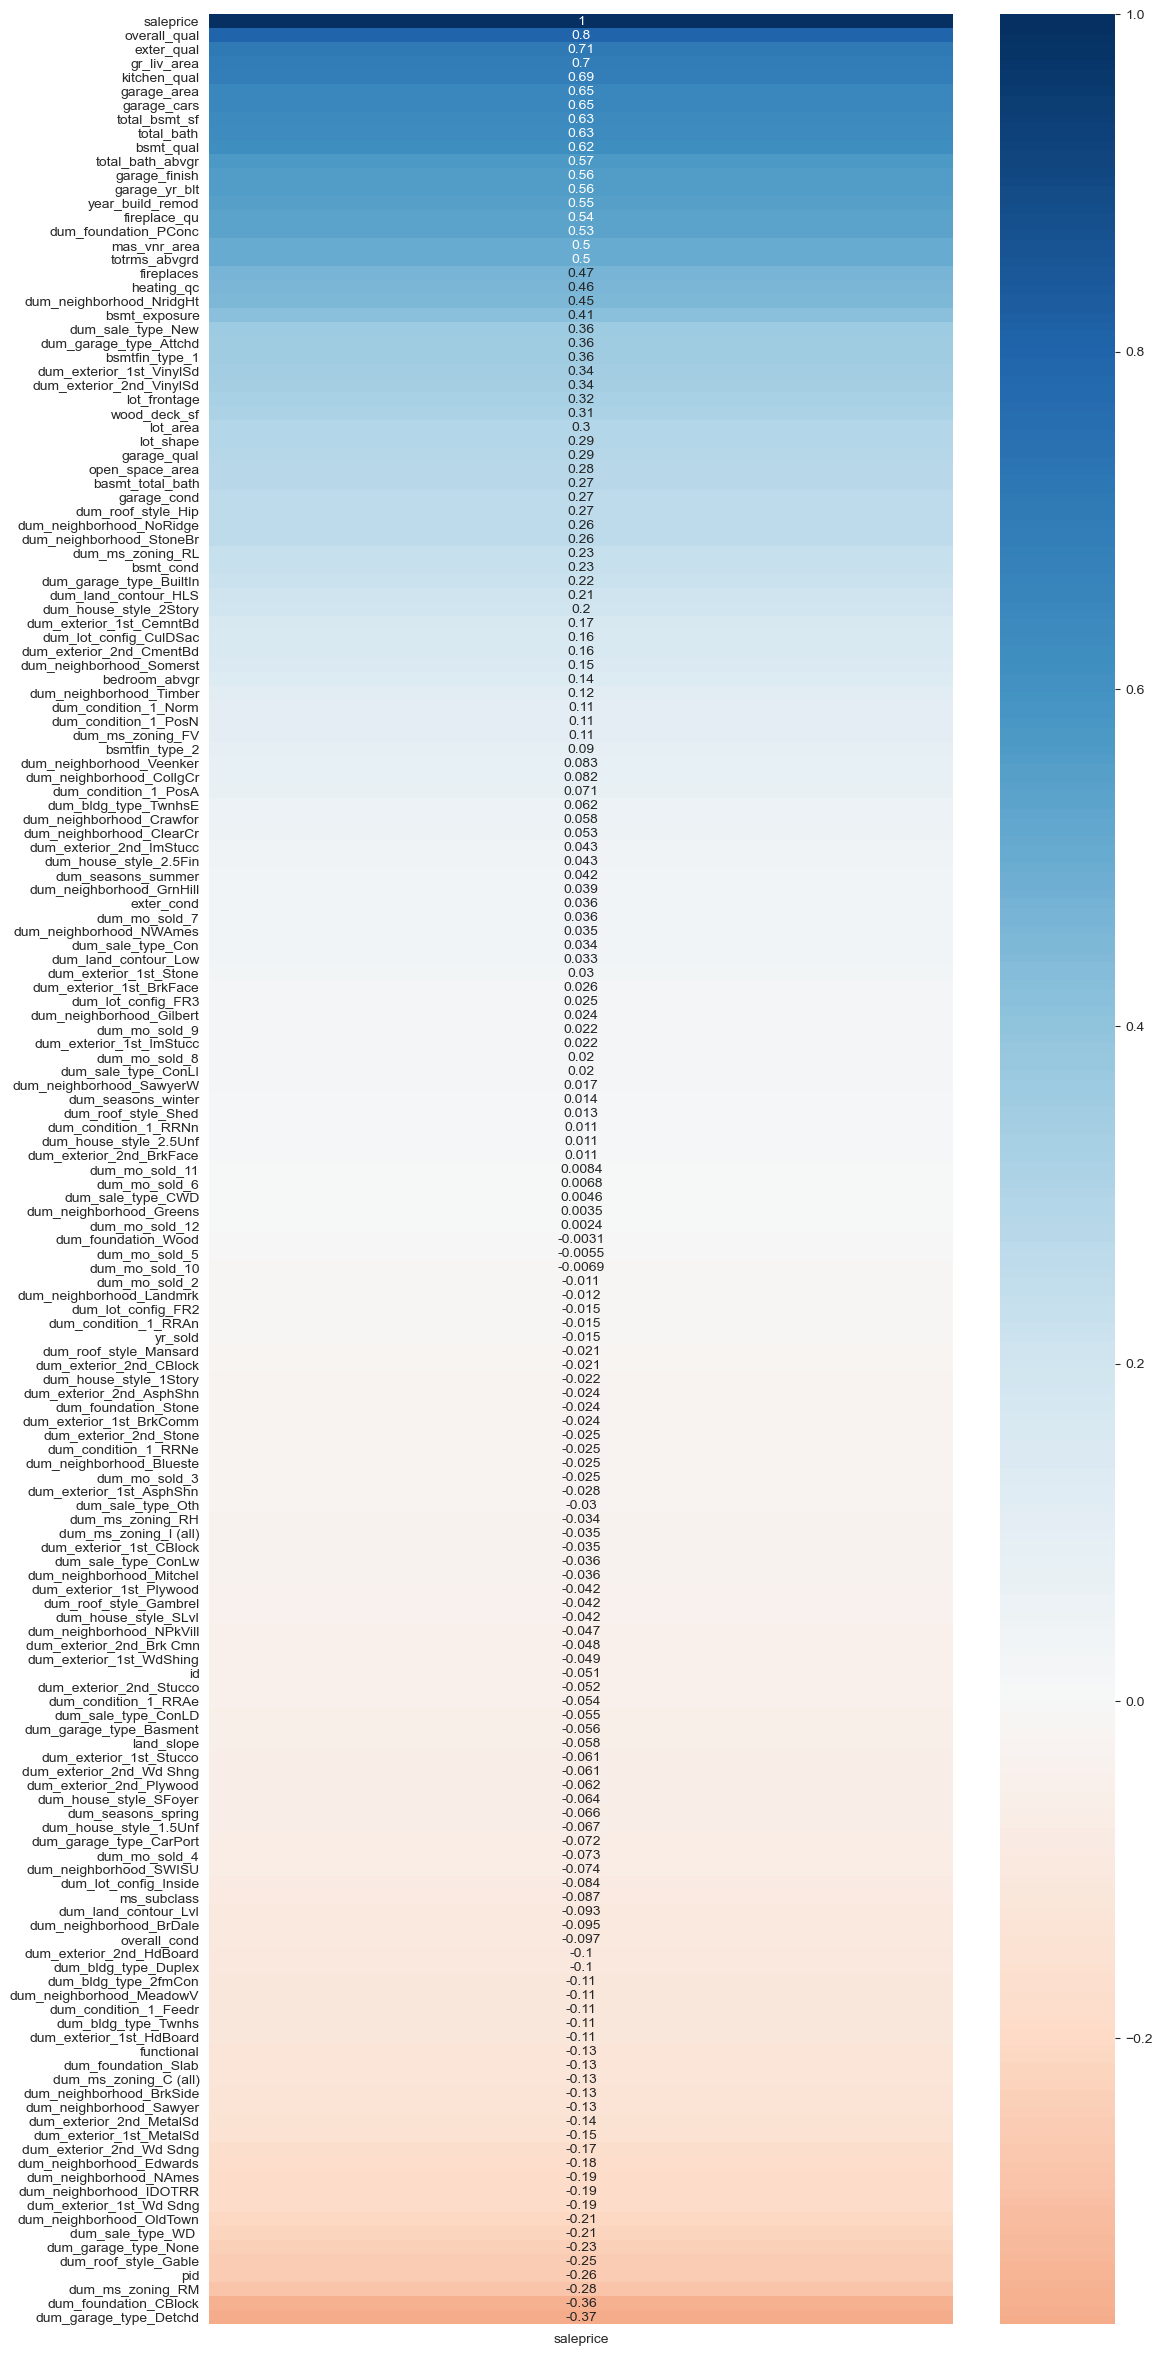

In [102]:
# Correlation of saleprice against all variables
figure = plt.figure(figsize=(12,30))
sns.heatmap(rs.corr()[['saleprice']].sort_values('saleprice',ascending=False),annot=True, cmap ='RdBu', center=0);

<span style="color:orange">Remarks</span>: From the heatmap of correlation of variables against saleprice, most of the variables are weakly correlated to saleprice. Only some variables such as `overall_qual` or `totrms_absgrd` exhibits strong correlation to saleprice (>0.5). There are also not variables that have strong negative correlation with saleprice, at most moderately negative correlated to saleprice (-0.37)

In [103]:
rs.shape

(2048, 165)

In [104]:
# Checkpoint #2
rs_old = rs.copy()

### Removing Outliers 
----
There are some features which are of interest and I will look into removing outliers

In [105]:
col_int = ['lot_frontage', 'lot_area', 'overall_qual', 'mas_vnr_area', 'gr_liv_area', 'fireplaces', 'garage_cars', 'basmt_total_bath', 'saleprice']

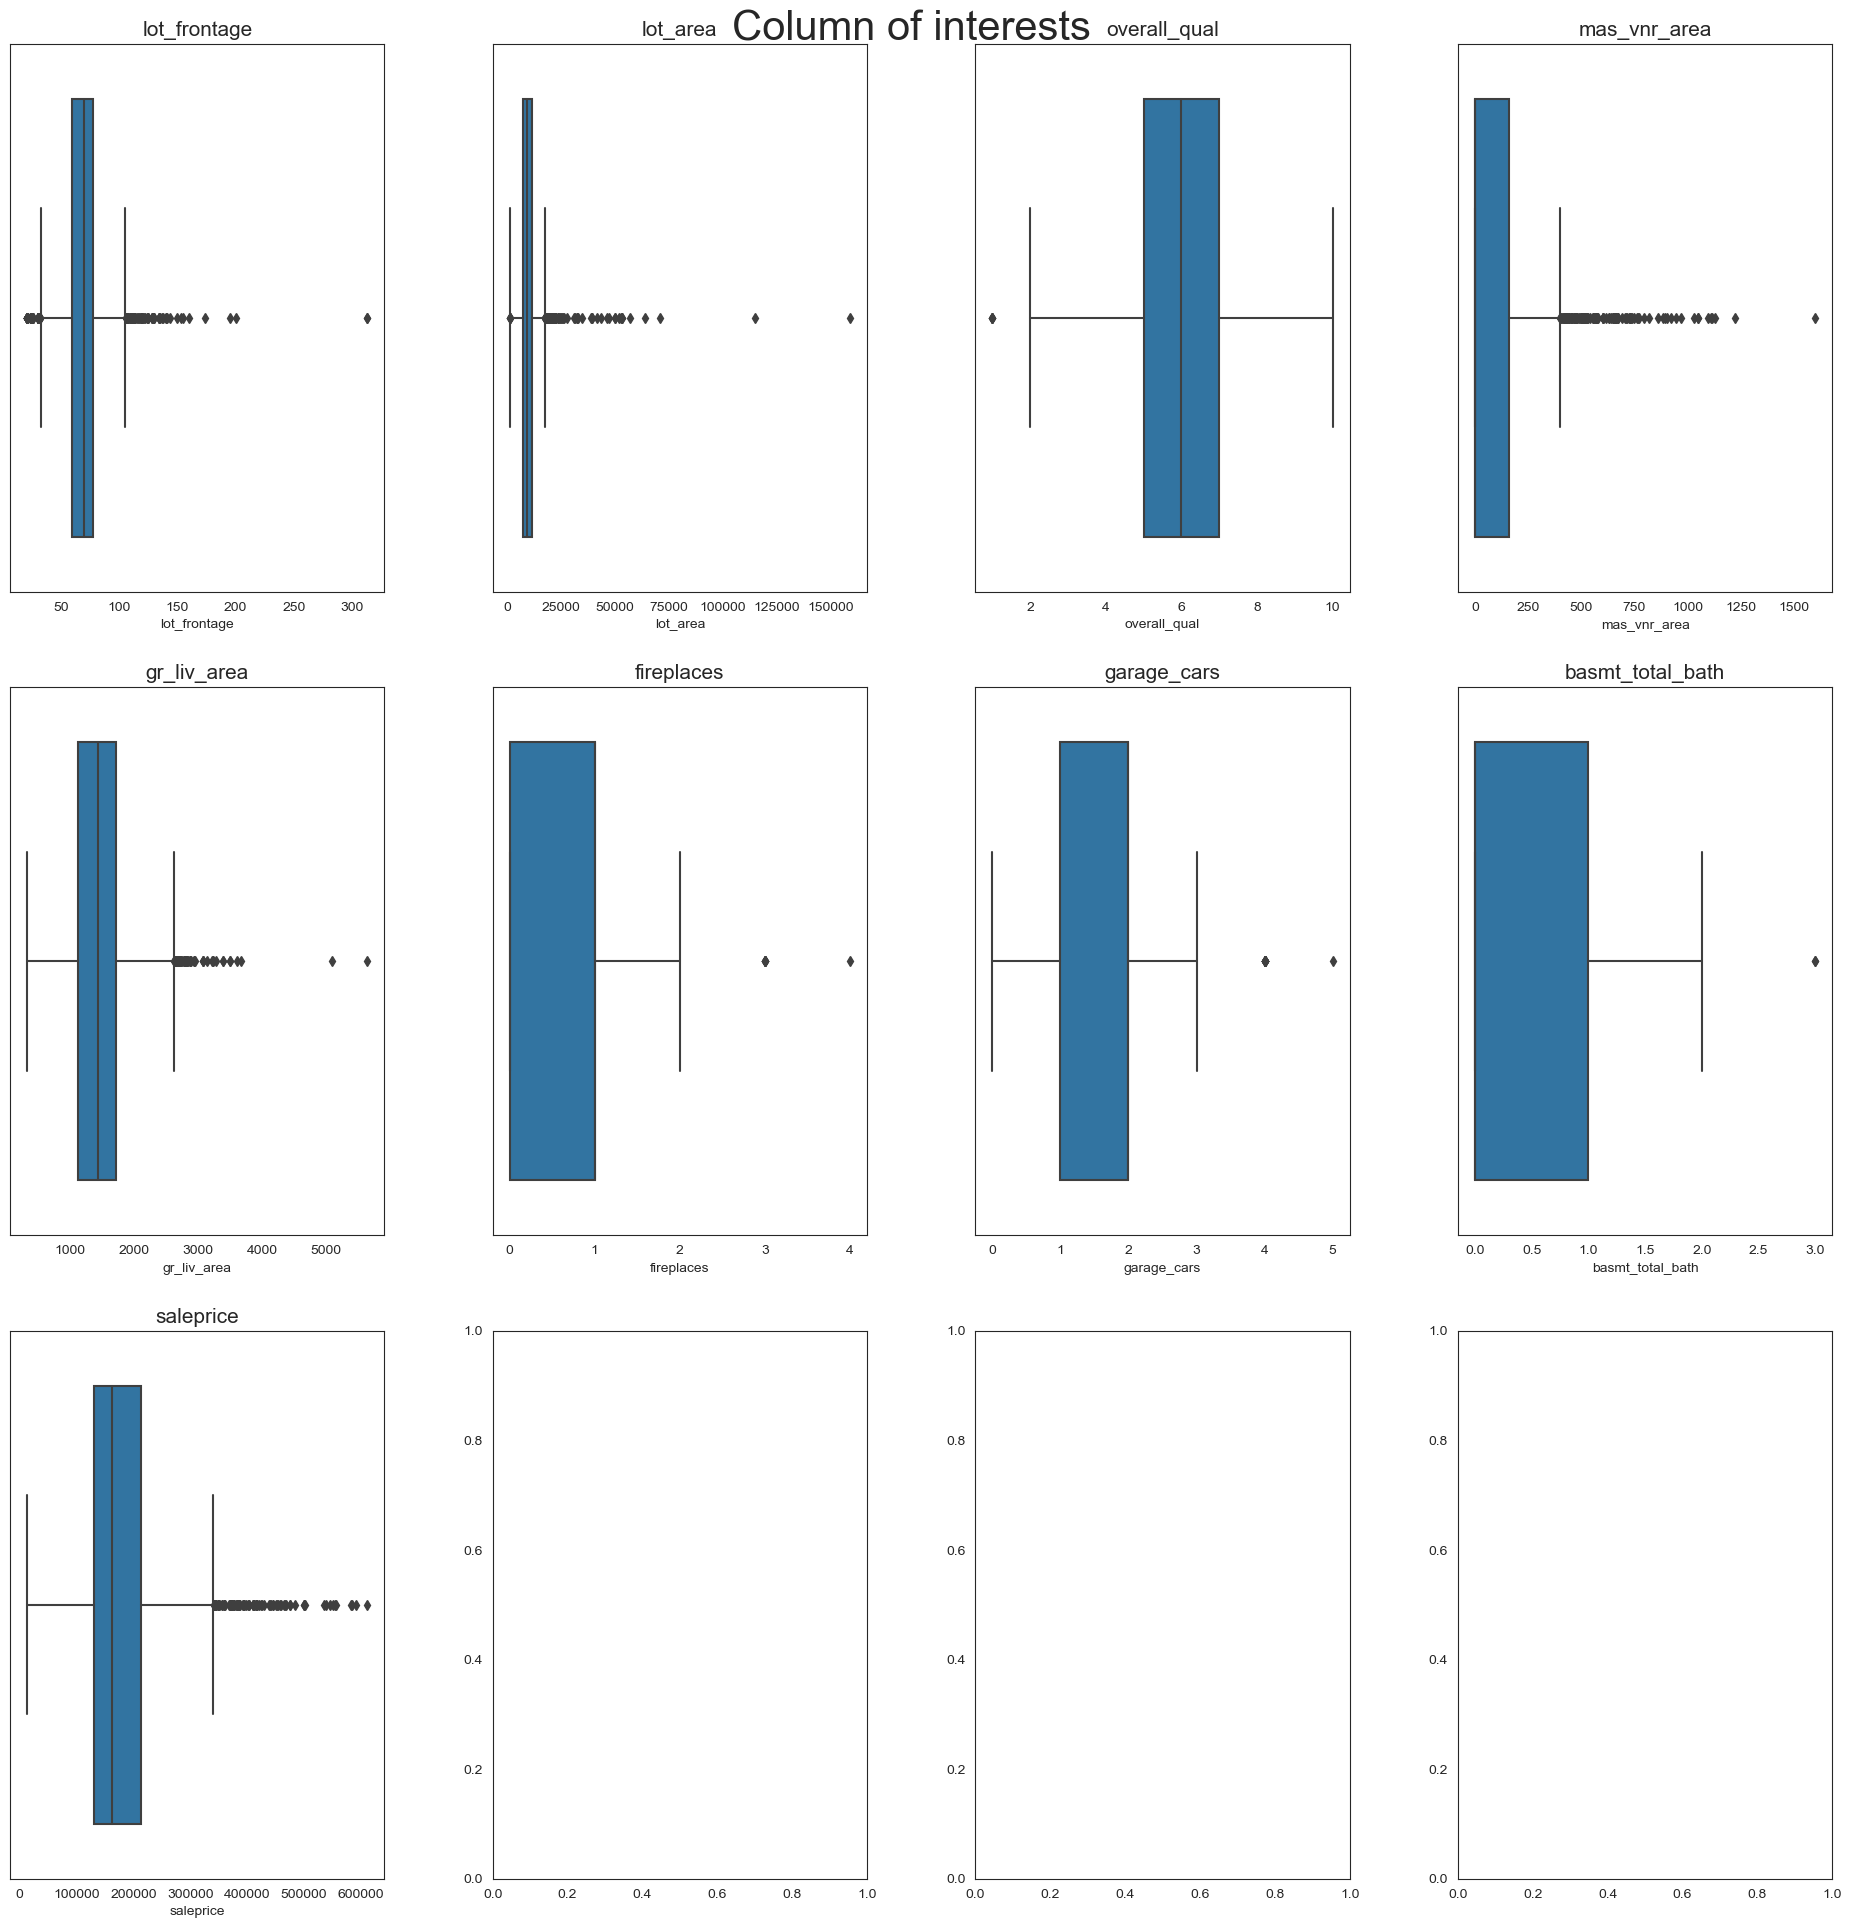

In [106]:
subplot_num_boxplot(rs,col_int,'Column of interests',col_int, (20,20))

#### lot_frontage

In [107]:
# Snap of outliers
print(f"Number of outlier in lot_frontage larger than 180: {len(rs[rs['lot_frontage']> 180])}")
rs[rs['lot_frontage']> 180]

Number of outlier in lot_frontage larger than 180: 4


,id,pid,ms_subclass,lot_frontage,lot_area,lot_shape,land_slope,overall_qual,overall_cond,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,total_bsmt_sf,heating_qc,gr_liv_area,bedroom_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,wood_deck_sf,yr_sold,saleprice,basmt_total_bath,total_bath_abvgr,total_bath,open_space_area,year_build_remod,dum_ms_zoning_C (all),dum_ms_zoning_FV,dum_ms_zoning_I (all),dum_ms_zoning_RH,dum_ms_zoning_RL,dum_ms_zoning_RM,dum_land_contour_HLS,dum_land_contour_Low,dum_land_contour_Lvl,dum_lot_config_CulDSac,...,dum_exterior_1st_VinylSd,dum_exterior_1st_Wd Sdng,dum_exterior_1st_WdShing,dum_exterior_2nd_AsphShn,dum_exterior_2nd_Brk Cmn,dum_exterior_2nd_BrkFace,dum_exterior_2nd_CBlock,dum_exterior_2nd_CmentBd,dum_exterior_2nd_HdBoard,dum_exterior_2nd_ImStucc,dum_exterior_2nd_MetalSd,dum_exterior_2nd_Plywood,dum_exterior_2nd_Stone,dum_exterior_2nd_Stucco,dum_exterior_2nd_VinylSd,dum_exterior_2nd_Wd Sdng,dum_exterior_2nd_Wd Shng,dum_foundation_CBlock,dum_foundation_PConc,dum_foundation_Slab,dum_foundation_Stone,dum_foundation_Wood,dum_garage_type_Attchd,dum_garage_type_Basment,dum_garage_type_BuiltIn,dum_garage_type_CarPort,dum_garage_type_Detchd,dum_garage_type_None,dum_sale_type_CWD,dum_sale_type_Con,dum_sale_type_ConLD,dum_sale_type_ConLI,dum_sale_type_ConLw,dum_sale_type_New,dum_sale_type_Oth,dum_sale_type_WD,dum_seasons_spring,dum_seasons_summer,dum_seasons_winter,dum_mo_sold_2,dum_mo_sold_3,dum_mo_sold_4,dum_mo_sold_5,dum_mo_sold_6,dum_mo_sold_7,dum_mo_sold_8,dum_mo_sold_9,dum_mo_sold_10,dum_mo_sold_11,dum_mo_sold_12
441,1639,527226040,190,195.00000,41600,1,3,5,5,0.00000,3,3,4,3,3,4.50000,2.50000,1100.00000,3,1424,3,3,7,3,0,0,1969.00000,1,3.00000,828.00000,3,3,1,2007,155000,1.00000,1.50000,2.50000,1,1990,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
960,1499,908154235,60,313.00000,63887,3,3,10,5,796.00000,5,3,5,3,3,5.00000,2.50000,6110.00000,5,5642,3,5,12,0,3,4,2008.00000,3,2.00000,1418.00000,3,3,1,2008,160000,2.00000,2.50000,4.50000,1,2008,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1335,1266,535427070,20,313.00000,27650,2,2,7,7,0.00000,3,3,4,3,3,5.00000,2.50000,585.00000,5,2069,4,4,9,0,1,4,1960.00000,2,2.00000,505.00000,3,3,0,2008,242000,1.00000,2.00000,3.00000,0,2007,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1875,2279,923202220,20,200.00000,43500,0,3,3,5,0.00000,3,3,0,0,0,0.00000,0.00000,0.00000,5,2034,2,3,9,1,0,0,1953.00000,2,4.00000,1041.00000,3,3,1,2007,130000,0.00000,1.00000,1.00000,1,1953,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [108]:
# Removal of outlier
print(f'Number of rows before removing outlier: {rs.shape[0]}')
rs = rs[rs['lot_frontage']< 180]
print(f'Number of rows after removing outlier: {rs.shape[0]}')

Number of rows before removing outlier: 2048
Number of rows after removing outlier: 2044


#### lot_area

In [109]:
# Snap of outliers
print(f"Number of outlier in lot_area larger than 50K: {len(rs[rs['lot_area']> 50000])}")
rs[rs['lot_area']> 50000]

Number of outlier in lot_area larger than 50K: 10


,id,pid,ms_subclass,lot_frontage,lot_area,lot_shape,land_slope,overall_qual,overall_cond,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,total_bsmt_sf,heating_qc,gr_liv_area,bedroom_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,wood_deck_sf,yr_sold,saleprice,basmt_total_bath,total_bath_abvgr,total_bath,open_space_area,year_build_remod,dum_ms_zoning_C (all),dum_ms_zoning_FV,dum_ms_zoning_I (all),dum_ms_zoning_RH,dum_ms_zoning_RL,dum_ms_zoning_RM,dum_land_contour_HLS,dum_land_contour_Low,dum_land_contour_Lvl,dum_lot_config_CulDSac,...,dum_exterior_1st_VinylSd,dum_exterior_1st_Wd Sdng,dum_exterior_1st_WdShing,dum_exterior_2nd_AsphShn,dum_exterior_2nd_Brk Cmn,dum_exterior_2nd_BrkFace,dum_exterior_2nd_CBlock,dum_exterior_2nd_CmentBd,dum_exterior_2nd_HdBoard,dum_exterior_2nd_ImStucc,dum_exterior_2nd_MetalSd,dum_exterior_2nd_Plywood,dum_exterior_2nd_Stone,dum_exterior_2nd_Stucco,dum_exterior_2nd_VinylSd,dum_exterior_2nd_Wd Sdng,dum_exterior_2nd_Wd Shng,dum_foundation_CBlock,dum_foundation_PConc,dum_foundation_Slab,dum_foundation_Stone,dum_foundation_Wood,dum_garage_type_Attchd,dum_garage_type_Basment,dum_garage_type_BuiltIn,dum_garage_type_CarPort,dum_garage_type_Detchd,dum_garage_type_None,dum_sale_type_CWD,dum_sale_type_Con,dum_sale_type_ConLD,dum_sale_type_ConLI,dum_sale_type_ConLw,dum_sale_type_New,dum_sale_type_Oth,dum_sale_type_WD,dum_seasons_spring,dum_seasons_summer,dum_seasons_winter,dum_mo_sold_2,dum_mo_sold_3,dum_mo_sold_4,dum_mo_sold_5,dum_mo_sold_6,dum_mo_sold_7,dum_mo_sold_8,dum_mo_sold_9,dum_mo_sold_10,dum_mo_sold_11,dum_mo_sold_12
471,2116,906426060,50,73.48551,159000,2,1,6,7,472.00000,4,3,4,3,3,3.50000,2.50000,1444.00000,4,2144,4,4,7,0,2,3,1958.00000,3,2.00000,389.00000,3,3,0,2007,277000,0.50000,2.00000,2.50000,1,2006,0,0,0,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
694,2072,905301050,20,73.48551,115149,2,1,7,5,351.00000,3,3,4,3,3,5.00000,2.50000,1643.00000,3,1824,2,4,5,0,2,3,1971.00000,1,2.00000,739.00000,3,3,1,2007,302000,1.00000,2.00000,3.00000,1,2002,0,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
745,315,916125360,20,73.48551,57200,1,1,5,5,0.00000,3,3,3,3,2,4.00000,3.50000,747.00000,3,1687,3,3,7,1,2,3,1966.00000,1,2.00000,572.00000,3,3,0,2010,160000,1.00000,1.00000,2.00000,1,1950,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
823,16,527216070,60,47.00000,53504,2,2,8,5,603.00000,5,3,4,3,3,4.50000,2.50000,1650.00000,5,3279,4,5,12,3,1,4,2003.00000,3,3.00000,841.00000,3,3,1,2010,538000,1.00000,3.50000,4.50000,1,2003,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1052,1403,905401060,20,73.48551,53227,1,2,4,6,0.00000,3,3,4,3,3,4.00000,2.50000,1364.00000,5,1663,2,4,6,1,2,4,1954.00000,3,2.00000,529.00000,3,3,1,2008,256000,1.00000,1.00000,2.00000,1,1994,0,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1571,2523,533350050,20,68.00000,50271,1,3,9,5,0.00000,4,3,5,3,3,5.00000,2.50000,1842.00000,4,1842,0,4,5,0,1,4,1981.00000,3,3.00000,894.00000,3,3,1,2006,385000,2.00000,0.50000,2.50000,1,1987,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1726,2894,916325040,20,73.48551,50102,1,2,6,5,0.00000,3,3,4,3,3,4.00000,2.50000,1632.00000,3,1650,2,3,6,0,2,4,1958.00000,1,2.00000,518.00000,3,3,0,2006,250764,1.00000,1.00000,2.00000,1,1958,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1843,2117,906426195,60,73.48551,53107,2,2,6,5,0.00000,4,3,4,3,2,5.00000,2.50000,1580.0

In [110]:
# Removal of outlier
print(f'Number of rows before removing outlier: {rs.shape[0]}')
rs = rs[rs['lot_area']< 50000]
print(f'Number of rows after removing outlier: {rs.shape[0]}')

Number of rows before removing outlier: 2044
Number of rows after removing outlier: 2034


#### overall_qual

In [111]:
# Snap of outliers
print(f"Number of outlier in overall_qual less than 2: {len(rs[rs['overall_qual']< 2])}")
rs[rs['overall_qual']< 2]

Number of outlier in overall_qual less than 2: 4


,id,pid,ms_subclass,lot_frontage,lot_area,lot_shape,land_slope,overall_qual,overall_cond,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,total_bsmt_sf,heating_qc,gr_liv_area,bedroom_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,wood_deck_sf,yr_sold,saleprice,basmt_total_bath,total_bath_abvgr,total_bath,open_space_area,year_build_remod,dum_ms_zoning_C (all),dum_ms_zoning_FV,dum_ms_zoning_I (all),dum_ms_zoning_RH,dum_ms_zoning_RL,dum_ms_zoning_RM,dum_land_contour_HLS,dum_land_contour_Low,dum_land_contour_Lvl,dum_lot_config_CulDSac,...,dum_exterior_1st_VinylSd,dum_exterior_1st_Wd Sdng,dum_exterior_1st_WdShing,dum_exterior_2nd_AsphShn,dum_exterior_2nd_Brk Cmn,dum_exterior_2nd_BrkFace,dum_exterior_2nd_CBlock,dum_exterior_2nd_CmentBd,dum_exterior_2nd_HdBoard,dum_exterior_2nd_ImStucc,dum_exterior_2nd_MetalSd,dum_exterior_2nd_Plywood,dum_exterior_2nd_Stone,dum_exterior_2nd_Stucco,dum_exterior_2nd_VinylSd,dum_exterior_2nd_Wd Sdng,dum_exterior_2nd_Wd Shng,dum_foundation_CBlock,dum_foundation_PConc,dum_foundation_Slab,dum_foundation_Stone,dum_foundation_Wood,dum_garage_type_Attchd,dum_garage_type_Basment,dum_garage_type_BuiltIn,dum_garage_type_CarPort,dum_garage_type_Detchd,dum_garage_type_None,dum_sale_type_CWD,dum_sale_type_Con,dum_sale_type_ConLD,dum_sale_type_ConLI,dum_sale_type_ConLw,dum_sale_type_New,dum_sale_type_Oth,dum_sale_type_WD,dum_seasons_spring,dum_seasons_summer,dum_seasons_winter,dum_mo_sold_2,dum_mo_sold_3,dum_mo_sold_4,dum_mo_sold_5,dum_mo_sold_6,dum_mo_sold_7,dum_mo_sold_8,dum_mo_sold_9,dum_mo_sold_10,dum_mo_sold_11,dum_mo_sold_12
183,1554,910251050,20,80.00000,14584,0,2,1,5,0.00000,2,1,0,0,0,0.00000,0.00000,0.00000,1,733,2,2,4,7,0,0,1952.00000,1,2.00000,487.00000,2,1,0,2008,13100,0.00000,1.00000,1.00000,0,1952,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0
635,2904,923125030,20,125.00000,31250,0,3,1,3,0.00000,3,2,0,0,0,0.00000,0.00000,0.00000,3,1600,3,3,6,3,0,0,1951.00000,1,1.00000,270.00000,2,3,0,2006,81500,0.00000,1.50000,1.50000,1,1951,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1372,766,904301375,30,73.48551,10020,1,1,1,1,0.00000,2,2,2,1,3,4.00000,2.50000,683.00000,4,904,1,2,4,4,0,0,1922.00000,0,0.00000,0.00000,0,0,0,2009,61000,1.00000,0.50000,1.50000,0,1950,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1428,1902,534450090,20,50.00000,5000,0,2,1,3,0.00000,2,2,0,0,0,0.00000,0.00000,0.00000,2,334,1,2,2,0,0,0,1946.00000,0,0.00000,0.00000,0,0,0,2007,39300,0.00000,1.00000,1.00000,0,1950,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [112]:
# Removal of outlier
print(f'Number of rows before removing outlier: {rs.shape[0]}')
rs = rs[rs['overall_qual']>= 2]
print(f'Number of rows after removing outlier: {rs.shape[0]}')

Number of rows before removing outlier: 2034
Number of rows after removing outlier: 2030


#### mas_vnr_area

In [113]:
# Snap of outliers
print(f"Number of outlier in mas_vnr_area larger than 1250: {len(rs[rs['mas_vnr_area']> 1200])}")
rs[rs['mas_vnr_area']> 1200]

Number of outlier in mas_vnr_area larger than 1250: 2


,id,pid,ms_subclass,lot_frontage,lot_area,lot_shape,land_slope,overall_qual,overall_cond,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,total_bsmt_sf,heating_qc,gr_liv_area,bedroom_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,wood_deck_sf,yr_sold,saleprice,basmt_total_bath,total_bath_abvgr,total_bath,open_space_area,year_build_remod,dum_ms_zoning_C (all),dum_ms_zoning_FV,dum_ms_zoning_I (all),dum_ms_zoning_RH,dum_ms_zoning_RL,dum_ms_zoning_RM,dum_land_contour_HLS,dum_land_contour_Low,dum_land_contour_Lvl,dum_lot_config_CulDSac,...,dum_exterior_1st_VinylSd,dum_exterior_1st_Wd Sdng,dum_exterior_1st_WdShing,dum_exterior_2nd_AsphShn,dum_exterior_2nd_Brk Cmn,dum_exterior_2nd_BrkFace,dum_exterior_2nd_CBlock,dum_exterior_2nd_CmentBd,dum_exterior_2nd_HdBoard,dum_exterior_2nd_ImStucc,dum_exterior_2nd_MetalSd,dum_exterior_2nd_Plywood,dum_exterior_2nd_Stone,dum_exterior_2nd_Stucco,dum_exterior_2nd_VinylSd,dum_exterior_2nd_Wd Sdng,dum_exterior_2nd_Wd Shng,dum_foundation_CBlock,dum_foundation_PConc,dum_foundation_Slab,dum_foundation_Stone,dum_foundation_Wood,dum_garage_type_Attchd,dum_garage_type_Basment,dum_garage_type_BuiltIn,dum_garage_type_CarPort,dum_garage_type_Detchd,dum_garage_type_None,dum_sale_type_CWD,dum_sale_type_Con,dum_sale_type_ConLD,dum_sale_type_ConLI,dum_sale_type_ConLw,dum_sale_type_New,dum_sale_type_Oth,dum_sale_type_WD,dum_seasons_spring,dum_seasons_summer,dum_seasons_winter,dum_mo_sold_2,dum_mo_sold_3,dum_mo_sold_4,dum_mo_sold_5,dum_mo_sold_6,dum_mo_sold_7,dum_mo_sold_8,dum_mo_sold_9,dum_mo_sold_10,dum_mo_sold_11,dum_mo_sold_12
1409,1850,533241030,60,66.00000,7399,1,3,7,5,1600.00000,4,3,4,3,0,4.00000,2.50000,975.00000,5,1950,3,4,7,0,1,3,1997.00000,2,2.00000,576.00000,3,3,0,2007,239000,0.00000,2.50000,2.50000,1,1998,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1885,2181,908154195,20,128.00000,39290,1,3,10,5,1224.00000,5,3,5,3,3,5.00000,2.50000,5095.00000,5,5095,2,5,15,0,2,4,2008.00000,3,3.00000,1154.00000,3,3,1,2007,183850,1.50000,2.50000,4.00000,1,2009,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [114]:
# Removal of outlier
print(f'Number of rows before removing outlier: {rs.shape[0]}')
rs = rs[rs['mas_vnr_area']< 1200]
print(f'Number of rows after removing outlier: {rs.shape[0]}')

Number of rows before removing outlier: 2030
Number of rows after removing outlier: 2028


#### gr_liv_area

In [115]:
# Snap of outliers
print(f"Number of outlier in gr_liv_area > 4000: {len(rs[rs['gr_liv_area']>4000])}")
rs[rs['gr_liv_area']>4000]

Number of outlier in gr_liv_area > 4000: 0


,id,pid,ms_subclass,lot_frontage,lot_area,lot_shape,land_slope,overall_qual,overall_cond,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,total_bsmt_sf,heating_qc,gr_liv_area,bedroom_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,wood_deck_sf,yr_sold,saleprice,basmt_total_bath,total_bath_abvgr,total_bath,open_space_area,year_build_remod,dum_ms_zoning_C (all),dum_ms_zoning_FV,dum_ms_zoning_I (all),dum_ms_zoning_RH,dum_ms_zoning_RL,dum_ms_zoning_RM,dum_land_contour_HLS,dum_land_contour_Low,dum_land_contour_Lvl,dum_lot_config_CulDSac,...,dum_exterior_1st_VinylSd,dum_exterior_1st_Wd Sdng,dum_exterior_1st_WdShing,dum_exterior_2nd_AsphShn,dum_exterior_2nd_Brk Cmn,dum_exterior_2nd_BrkFace,dum_exterior_2nd_CBlock,dum_exterior_2nd_CmentBd,dum_exterior_2nd_HdBoard,dum_exterior_2nd_ImStucc,dum_exterior_2nd_MetalSd,dum_exterior_2nd_Plywood,dum_exterior_2nd_Stone,dum_exterior_2nd_Stucco,dum_exterior_2nd_VinylSd,dum_exterior_2nd_Wd Sdng,dum_exterior_2nd_Wd Shng,dum_foundation_CBlock,dum_foundation_PConc,dum_foundation_Slab,dum_foundation_Stone,dum_foundation_Wood,dum_garage_type_Attchd,dum_garage_type_Basment,dum_garage_type_BuiltIn,dum_garage_type_CarPort,dum_garage_type_Detchd,dum_garage_type_None,dum_sale_type_CWD,dum_sale_type_Con,dum_sale_type_ConLD,dum_sale_type_ConLI,dum_sale_type_ConLw,dum_sale_type_New,dum_sale_type_Oth,dum_sale_type_WD,dum_seasons_spring,dum_seasons_summer,dum_seasons_winter,dum_mo_sold_2,dum_mo_sold_3,dum_mo_sold_4,dum_mo_sold_5,dum_mo_sold_6,dum_mo_sold_7,dum_mo_sold_8,dum_mo_sold_9,dum_mo_sold_10,dum_mo_sold_11,dum_mo_sold_12


In [116]:
# Removal of outlier
print(f'Number of rows before removing outlier: {rs.shape[0]}')
rs = rs[rs['gr_liv_area']<4000]
print(f'Number of rows after removing outlier: {rs.shape[0]}')

Number of rows before removing outlier: 2028
Number of rows after removing outlier: 2028


#### fireplaces

In [117]:
# Snap of outliers
print(f"Number of outlier in fireplaces > 2: {len(rs[rs['fireplaces']>2])}")
rs[rs['fireplaces']>2]

Number of outlier in fireplaces > 2: 6


,id,pid,ms_subclass,lot_frontage,lot_area,lot_shape,land_slope,overall_qual,overall_cond,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,total_bsmt_sf,heating_qc,gr_liv_area,bedroom_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,wood_deck_sf,yr_sold,saleprice,basmt_total_bath,total_bath_abvgr,total_bath,open_space_area,year_build_remod,dum_ms_zoning_C (all),dum_ms_zoning_FV,dum_ms_zoning_I (all),dum_ms_zoning_RH,dum_ms_zoning_RL,dum_ms_zoning_RM,dum_land_contour_HLS,dum_land_contour_Low,dum_land_contour_Lvl,dum_lot_config_CulDSac,...,dum_exterior_1st_VinylSd,dum_exterior_1st_Wd Sdng,dum_exterior_1st_WdShing,dum_exterior_2nd_AsphShn,dum_exterior_2nd_Brk Cmn,dum_exterior_2nd_BrkFace,dum_exterior_2nd_CBlock,dum_exterior_2nd_CmentBd,dum_exterior_2nd_HdBoard,dum_exterior_2nd_ImStucc,dum_exterior_2nd_MetalSd,dum_exterior_2nd_Plywood,dum_exterior_2nd_Stone,dum_exterior_2nd_Stucco,dum_exterior_2nd_VinylSd,dum_exterior_2nd_Wd Sdng,dum_exterior_2nd_Wd Shng,dum_foundation_CBlock,dum_foundation_PConc,dum_foundation_Slab,dum_foundation_Stone,dum_foundation_Wood,dum_garage_type_Attchd,dum_garage_type_Basment,dum_garage_type_BuiltIn,dum_garage_type_CarPort,dum_garage_type_Detchd,dum_garage_type_None,dum_sale_type_CWD,dum_sale_type_Con,dum_sale_type_ConLD,dum_sale_type_ConLI,dum_sale_type_ConLw,dum_sale_type_New,dum_sale_type_Oth,dum_sale_type_WD,dum_seasons_spring,dum_seasons_summer,dum_seasons_winter,dum_mo_sold_2,dum_mo_sold_3,dum_mo_sold_4,dum_mo_sold_5,dum_mo_sold_6,dum_mo_sold_7,dum_mo_sold_8,dum_mo_sold_9,dum_mo_sold_10,dum_mo_sold_11,dum_mo_sold_12
761,2499,532476050,80,100.00000,14330,1,3,7,4,145.00000,4,2,4,3,3,4.50000,4.00000,1748.00000,4,2646,3,4,9,3,4,3,1974.00000,2,2.00000,550.00000,3,3,1,2006,260000,2.00000,2.00000,4.00000,1,1974,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1000,786,905401100,20,73.48551,10708,1,3,5,5,0.00000,4,3,3,3,0,3.00000,4.00000,1617.00000,5,1867,2,3,7,0,3,4,1955.00000,3,1.00000,303.00000,3,3,1,2009,190000,1.00000,1.00000,2.00000,1,1993,0,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1304,344,526355080,80,75.00000,13860,0,3,8,7,0.00000,4,3,4,3,3,5.00000,2.50000,1952.00000,4,2704,4,5,9,0,3,3,1972.00000,3,2.00000,538.00000,3,3,1,2009,345000,1.00000,2.50000,3.50000,1,1995,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1572,627,535125090,60,85.00000,13600,0,3,7,6,176.00000,3,3,3,3,0,4.00000,2.50000,768.00000,3,1986,3,3,7,0,3,2,1965.00000,1,2.00000,486.00000,3,3,0,2009,205000,0.00000,2.50000,2.50000,1,1990,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1729,1925,535177110,20,80.00000,9736,0,3,6,6,289.00000,3,3,3,3,0,4.00000,3.50000,1331.00000,4,1721,4,3,8,0,3,3,1957.00000,1,2.00000,464.00000,3,3,0,2007,174850,0.00000,1.00000,1.00000,0,1969,0,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1737,2501,533125120,60,105.00000,11025,0,2,8,5,692.00000,4,3,5,3,3,5.00000,2.50000,1334.00000,5,2826,3,4,9,0,3,3,1992.00000,2,3.00000,888.00000,3,3,1,2006,334000,1.00000,2.50000,3.50000,1,1993,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [118]:
# Removal of outlier
print(f'Number of rows before removing outlier: {rs.shape[0]}')
rs = rs[rs['fireplaces']<=2]
print(f'Number of rows after removing outlier: {rs.shape[0]}')

Number of rows before removing outlier: 2028
Number of rows after removing outlier: 2022


#### garage_cars

In [119]:
# Snap of outliers
print(f"Number of outlier in garage_cars > 3: {len(rs[(rs['garage_cars']>3) & (rs['saleprice']>400000)])}")
rs[(rs['garage_cars']>3) & (rs['saleprice']>400000)]

Number of outlier in garage_cars > 3: 1


,id,pid,ms_subclass,lot_frontage,lot_area,lot_shape,land_slope,overall_qual,overall_cond,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,total_bsmt_sf,heating_qc,gr_liv_area,bedroom_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,wood_deck_sf,yr_sold,saleprice,basmt_total_bath,total_bath_abvgr,total_bath,open_space_area,year_build_remod,dum_ms_zoning_C (all),dum_ms_zoning_FV,dum_ms_zoning_I (all),dum_ms_zoning_RH,dum_ms_zoning_RL,dum_ms_zoning_RM,dum_land_contour_HLS,dum_land_contour_Low,dum_land_contour_Lvl,dum_lot_config_CulDSac,...,dum_exterior_1st_VinylSd,dum_exterior_1st_Wd Sdng,dum_exterior_1st_WdShing,dum_exterior_2nd_AsphShn,dum_exterior_2nd_Brk Cmn,dum_exterior_2nd_BrkFace,dum_exterior_2nd_CBlock,dum_exterior_2nd_CmentBd,dum_exterior_2nd_HdBoard,dum_exterior_2nd_ImStucc,dum_exterior_2nd_MetalSd,dum_exterior_2nd_Plywood,dum_exterior_2nd_Stone,dum_exterior_2nd_Stucco,dum_exterior_2nd_VinylSd,dum_exterior_2nd_Wd Sdng,dum_exterior_2nd_Wd Shng,dum_foundation_CBlock,dum_foundation_PConc,dum_foundation_Slab,dum_foundation_Stone,dum_foundation_Wood,dum_garage_type_Attchd,dum_garage_type_Basment,dum_garage_type_BuiltIn,dum_garage_type_CarPort,dum_garage_type_Detchd,dum_garage_type_None,dum_sale_type_CWD,dum_sale_type_Con,dum_sale_type_ConLD,dum_sale_type_ConLI,dum_sale_type_ConLw,dum_sale_type_New,dum_sale_type_Oth,dum_sale_type_WD,dum_seasons_spring,dum_seasons_summer,dum_seasons_winter,dum_mo_sold_2,dum_mo_sold_3,dum_mo_sold_4,dum_mo_sold_5,dum_mo_sold_6,dum_mo_sold_7,dum_mo_sold_8,dum_mo_sold_9,dum_mo_sold_10,dum_mo_sold_11,dum_mo_sold_12
332,1060,528118090,60,96.00000,12539,0,3,10,5,468.00000,5,3,5,3,3,5.00000,2.50000,1620.00000,5,2790,4,5,10,0,1,5,2005.00000,3,4.00000,1150.00000,3,3,1,2008,460000,1.00000,2.50000,3.50000,1,2006,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [120]:
# Removal of outlier
print(f'Number of rows before removing outlier: {rs.shape[0]}')
rs = rs.drop(index=332)
print(f'Number of rows after removing outlier: {rs.shape[0]}')

Number of rows before removing outlier: 2022
Number of rows after removing outlier: 2021


#### basmt_total_bath

In [121]:
# Snap of outliers
print(f"Number of outlier in basmt_total_bath == 3: {len(rs[rs['basmt_total_bath']==3])}")
rs[rs['basmt_total_bath']==3]

Number of outlier in basmt_total_bath == 3: 2


,id,pid,ms_subclass,lot_frontage,lot_area,lot_shape,land_slope,overall_qual,overall_cond,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,total_bsmt_sf,heating_qc,gr_liv_area,bedroom_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,wood_deck_sf,yr_sold,saleprice,basmt_total_bath,total_bath_abvgr,total_bath,open_space_area,year_build_remod,dum_ms_zoning_C (all),dum_ms_zoning_FV,dum_ms_zoning_I (all),dum_ms_zoning_RH,dum_ms_zoning_RL,dum_ms_zoning_RM,dum_land_contour_HLS,dum_land_contour_Low,dum_land_contour_Lvl,dum_lot_config_CulDSac,...,dum_exterior_1st_VinylSd,dum_exterior_1st_Wd Sdng,dum_exterior_1st_WdShing,dum_exterior_2nd_AsphShn,dum_exterior_2nd_Brk Cmn,dum_exterior_2nd_BrkFace,dum_exterior_2nd_CBlock,dum_exterior_2nd_CmentBd,dum_exterior_2nd_HdBoard,dum_exterior_2nd_ImStucc,dum_exterior_2nd_MetalSd,dum_exterior_2nd_Plywood,dum_exterior_2nd_Stone,dum_exterior_2nd_Stucco,dum_exterior_2nd_VinylSd,dum_exterior_2nd_Wd Sdng,dum_exterior_2nd_Wd Shng,dum_foundation_CBlock,dum_foundation_PConc,dum_foundation_Slab,dum_foundation_Stone,dum_foundation_Wood,dum_garage_type_Attchd,dum_garage_type_Basment,dum_garage_type_BuiltIn,dum_garage_type_CarPort,dum_garage_type_Detchd,dum_garage_type_None,dum_sale_type_CWD,dum_sale_type_Con,dum_sale_type_ConLD,dum_sale_type_ConLI,dum_sale_type_ConLw,dum_sale_type_New,dum_sale_type_Oth,dum_sale_type_WD,dum_seasons_spring,dum_seasons_summer,dum_seasons_winter,dum_mo_sold_2,dum_mo_sold_3,dum_mo_sold_4,dum_mo_sold_5,dum_mo_sold_6,dum_mo_sold_7,dum_mo_sold_8,dum_mo_sold_9,dum_mo_sold_10,dum_mo_sold_11,dum_mo_sold_12
791,763,904301060,90,60.00000,10800,0,3,5,5,0.00000,3,3,4,4,3,5.00000,2.50000,1200.00000,3,1200,3,3,5,0,0,0,1987.00000,0,0.00000,0.00000,0,0,1,2009,179000,3.00000,3.00000,6.00000,1,1988,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1584,764,904301070,90,60.00000,10800,0,3,5,5,0.00000,3,4,4,4,3,5.00000,2.50000,1200.00000,3,1200,3,3,5,0,0,0,1987.00000,0,0.00000,0.00000,0,0,1,2009,179000,3.00000,3.00000,6.00000,1,1988,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [122]:
# Removal of outlier
print(f'Number of rows before removing outlier: {rs.shape[0]}')
rs = rs[rs['basmt_total_bath']<3]
print(f'Number of rows after removing outlier: {rs.shape[0]}')

Number of rows before removing outlier: 2021
Number of rows after removing outlier: 2019


#### saleprice

In [123]:
# Snap of outliers
print(f"Number of outlier where saleprice > 550K: {len(rs[rs['saleprice']>550000])}")
rs[rs['saleprice']>550000]

Number of outlier where saleprice > 550K: 6


,id,pid,ms_subclass,lot_frontage,lot_area,lot_shape,land_slope,overall_qual,overall_cond,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,total_bsmt_sf,heating_qc,gr_liv_area,bedroom_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,wood_deck_sf,yr_sold,saleprice,basmt_total_bath,total_bath_abvgr,total_bath,open_space_area,year_build_remod,dum_ms_zoning_C (all),dum_ms_zoning_FV,dum_ms_zoning_I (all),dum_ms_zoning_RH,dum_ms_zoning_RL,dum_ms_zoning_RM,dum_land_contour_HLS,dum_land_contour_Low,dum_land_contour_Lvl,dum_lot_config_CulDSac,...,dum_exterior_1st_VinylSd,dum_exterior_1st_Wd Sdng,dum_exterior_1st_WdShing,dum_exterior_2nd_AsphShn,dum_exterior_2nd_Brk Cmn,dum_exterior_2nd_BrkFace,dum_exterior_2nd_CBlock,dum_exterior_2nd_CmentBd,dum_exterior_2nd_HdBoard,dum_exterior_2nd_ImStucc,dum_exterior_2nd_MetalSd,dum_exterior_2nd_Plywood,dum_exterior_2nd_Stone,dum_exterior_2nd_Stucco,dum_exterior_2nd_VinylSd,dum_exterior_2nd_Wd Sdng,dum_exterior_2nd_Wd Shng,dum_foundation_CBlock,dum_foundation_PConc,dum_foundation_Slab,dum_foundation_Stone,dum_foundation_Wood,dum_garage_type_Attchd,dum_garage_type_Basment,dum_garage_type_BuiltIn,dum_garage_type_CarPort,dum_garage_type_Detchd,dum_garage_type_None,dum_sale_type_CWD,dum_sale_type_Con,dum_sale_type_ConLD,dum_sale_type_ConLI,dum_sale_type_ConLw,dum_sale_type_New,dum_sale_type_Oth,dum_sale_type_WD,dum_seasons_spring,dum_seasons_summer,dum_seasons_winter,dum_mo_sold_2,dum_mo_sold_3,dum_mo_sold_4,dum_mo_sold_5,dum_mo_sold_6,dum_mo_sold_7,dum_mo_sold_8,dum_mo_sold_9,dum_mo_sold_10,dum_mo_sold_11,dum_mo_sold_12
151,2333,527212030,60,85.00000,16056,1,3,9,5,208.00000,4,3,5,3,2,5.00000,2.50000,1992.00000,5,2868,4,5,11,0,1,4,2005.00000,3,3.00000,716.00000,3,3,1,2006,556581,0.00000,3.50000,3.50000,1,2006,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
623,457,528176030,20,100.00000,14836,1,2,10,5,730.00000,5,3,5,3,3,5.00000,2.50000,2492.00000,5,2492,2,5,8,0,1,5,2004.00000,3,3.00000,949.00000,3,3,1,2009,552000,1.00000,2.50000,3.50000,1,2005,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0
1164,424,528106020,20,105.00000,15431,0,3,10,5,200.00000,5,3,5,3,3,5.00000,4.50000,3094.00000,5,2402,2,5,10,0,2,4,2008.00000,3,3.00000,672.00000,3,3,0,2009,555000,1.00000,2.00000,3.00000,1,2008,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1671,45,528150070,20,100.00000,12919,1,3,9,5,760.00000,5,3,5,3,3,5.00000,2.50000,2330.00000,5,2364,2,5,11,0,2,4,2009.00000,3,3.00000,820.00000,3,3,0,2010,611657,1.00000,2.50000,3.50000,1,2010,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1692,2451,528360050,60,114.00000,17242,1,3,9,5,738.00000,4,4,5,3,3,3.50000,5.00000,1733.00000,5,3500,4,5,11,0,1,3,1993.00000,2,3.00000,959.00000,3,3,1,2006,584500,1.00000,3.50000,4.50000,1,1994,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1796,434,528110090,60,107.00000,13891,0,3,9,5,424.00000,5,3,5,3,3,2.50000,2.50000,1734.00000,5,2822,4,5,12,0,1,4,2009.00000,2,3.00000,1020.00000,3,3,1,2009,582933,0.00000,3.50000,3.50000,1,2009,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [124]:
# Removal of outlier
print(f'Number of rows before removing outlier: {rs.shape[0]}')
rs = rs[rs['saleprice']<550000]
print(f'Number of rows after removing outlier: {rs.shape[0]}')

Number of rows before removing outlier: 2019
Number of rows after removing outlier: 2013


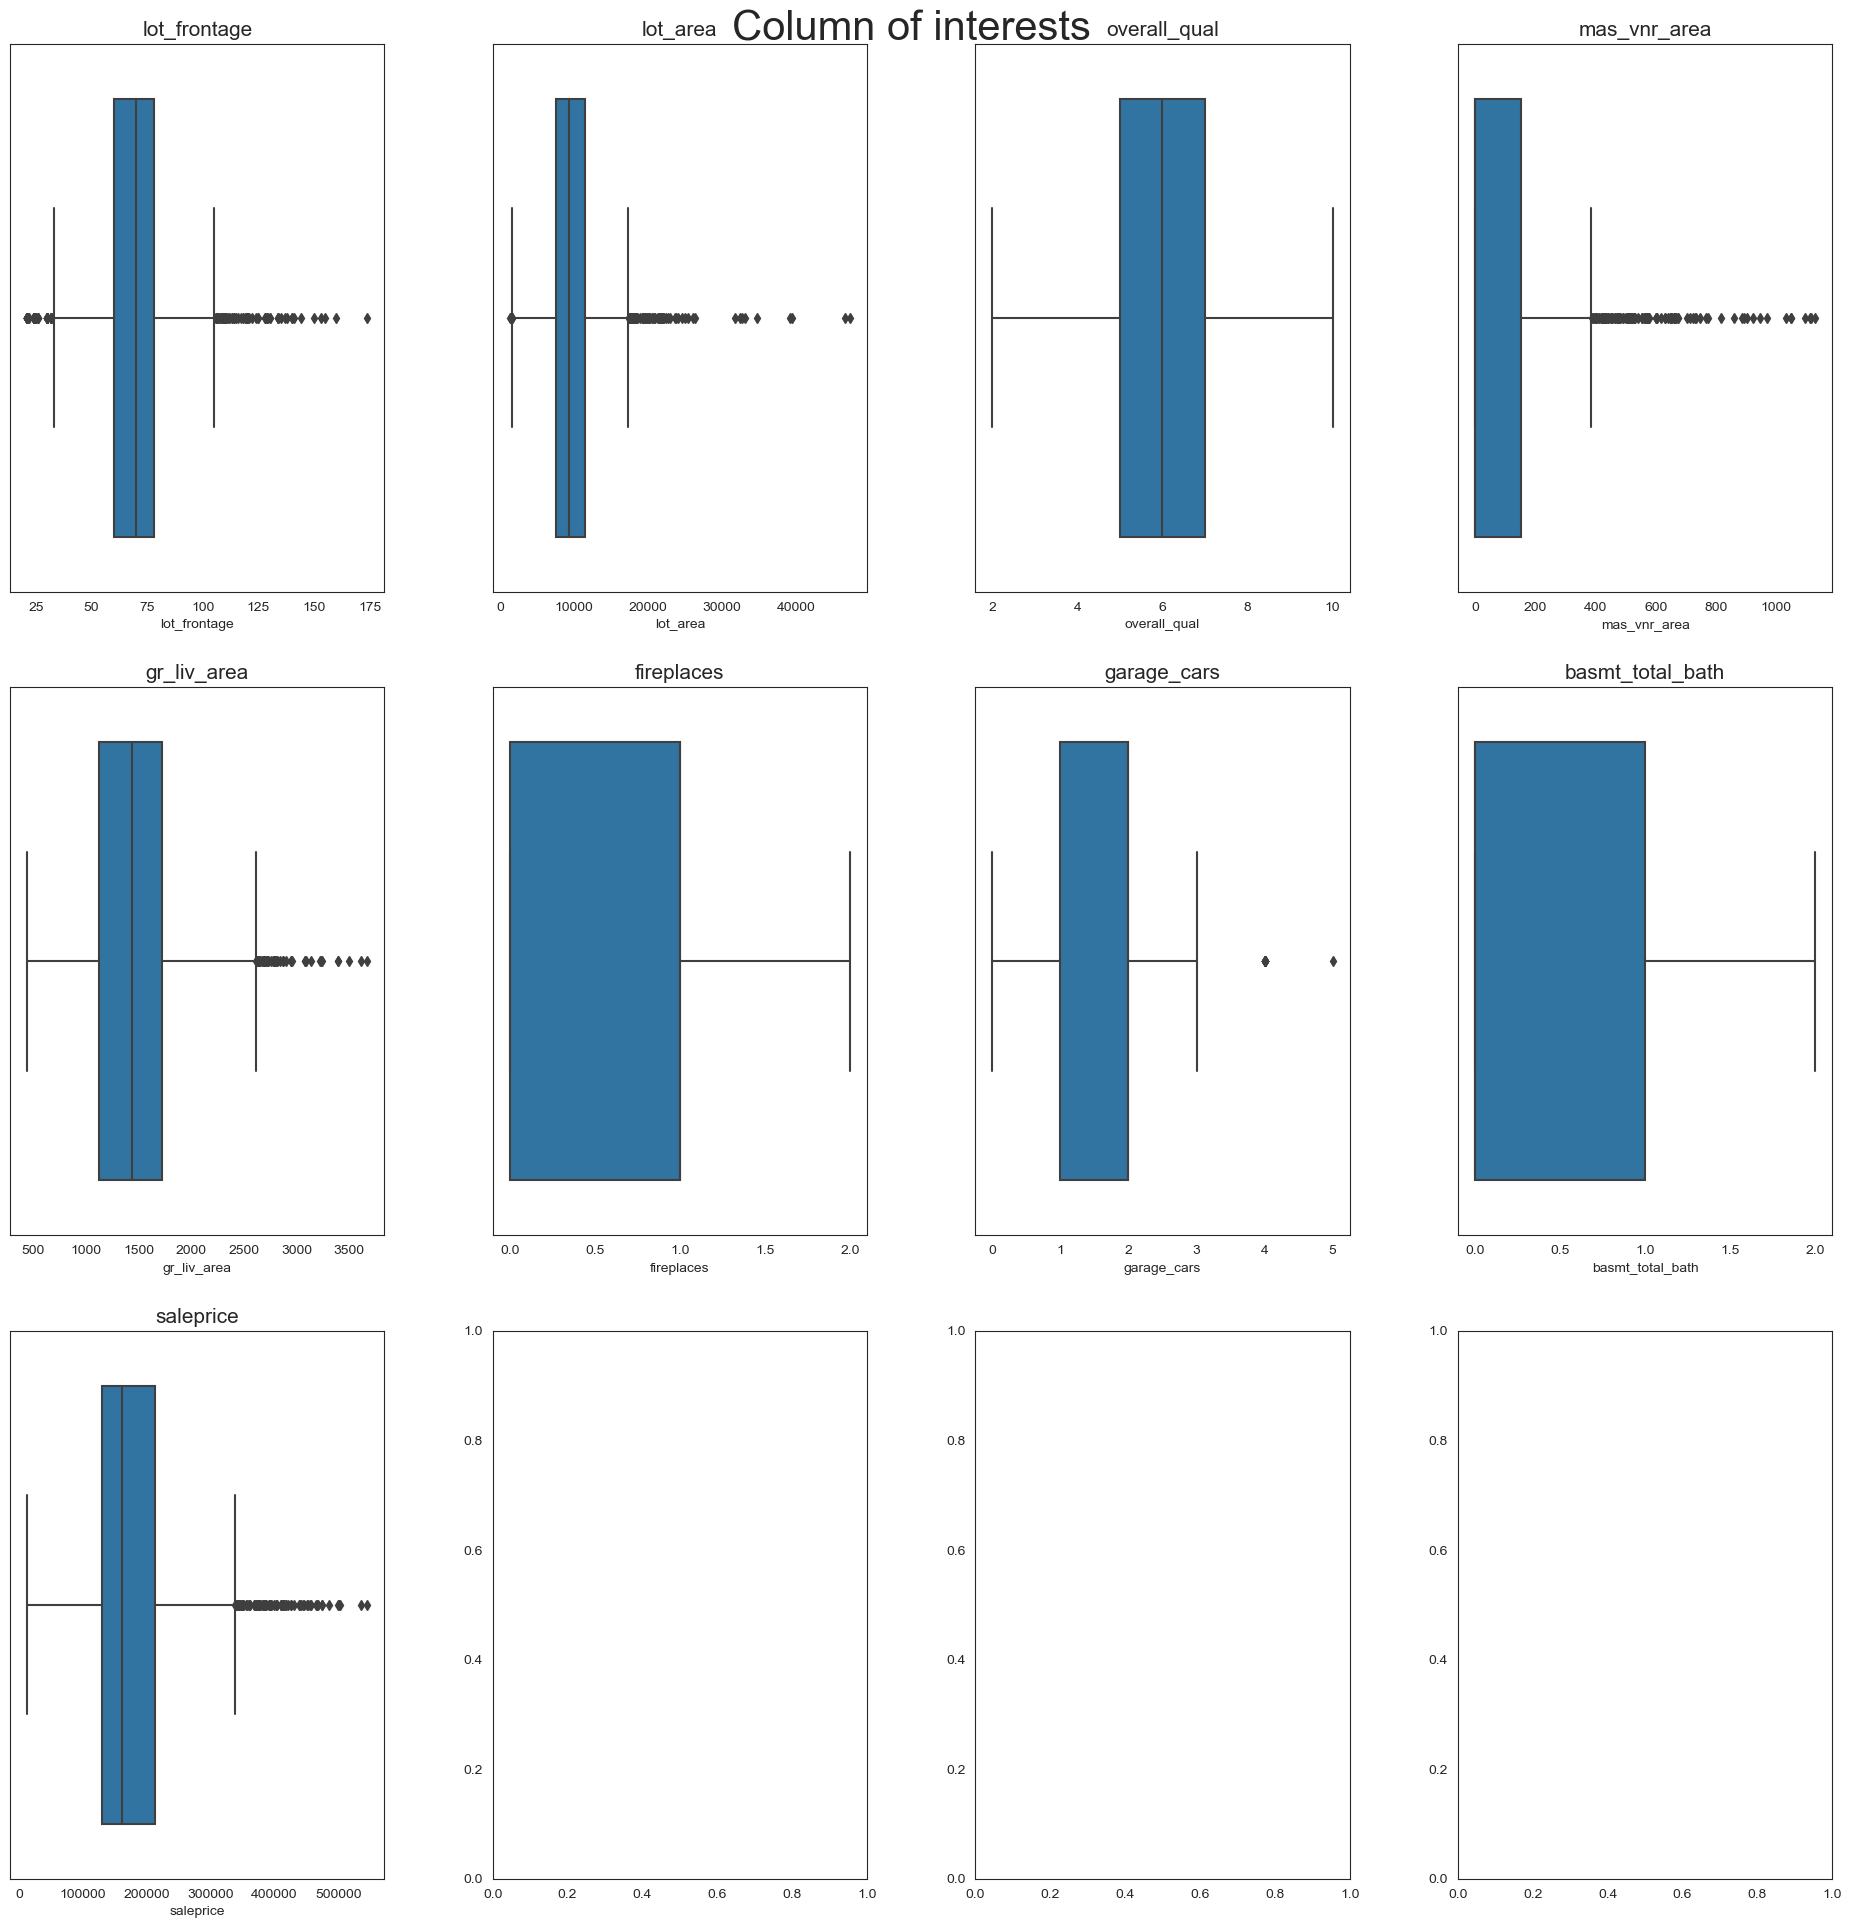

In [125]:
subplot_num_boxplot(rs,col_int,'Column of interests',col_int, (20,20))

<span style="color:orange">Remarks</span>: Base on scatter plot, I have proceed to remove some of the outliers. The main reason why outliers are removed is due to the fact that our prediction model can be sensitive to outliers. Hence removing them will make our model more robust.

In additon, not all outliers are removed totally as it will affect the integrity of the data. I have removed in total 38 rows resulting in a drop from 2051 to 2048. A reduction of about 1.85% of total data. 

## Apply changes to Test Data

In [126]:
# Import Test data
rs_test = pd.read_csv('../datasets/test.csv')

In [127]:
# Replace whitespace with '_' and change text to lower case
rs_test.columns = rs_test.columns.str.replace(' ','_',).str.lower()

In [128]:
rs_test.shape

(879, 80)

In [129]:
# Add Season as a feature
# Encode mon_sold
rs_test['seasons'] = rs_test['mo_sold'].map(lambda x: [i for i in encoder_dict['seasons'] if x in encoder_dict['seasons'][i]][0])

In [130]:
rs_test.isnull().sum()

id                   0
pid                  0
ms_subclass          0
ms_zoning            0
lot_frontage       160
lot_area             0
street               0
alley              821
lot_shape            0
land_contour         0
utilities            0
lot_config           0
land_slope           0
neighborhood         0
condition_1          0
condition_2          0
bldg_type            0
house_style          0
overall_qual         0
overall_cond         0
year_built           0
year_remod/add       0
roof_style           0
roof_matl            0
exterior_1st         0
exterior_2nd         0
mas_vnr_type         1
mas_vnr_area         1
exter_qual           0
exter_cond           0
foundation           0
bsmt_qual           25
bsmt_cond           25
bsmt_exposure       25
bsmtfin_type_1      25
bsmtfin_sf_1         0
bsmtfin_type_2      25
bsmtfin_sf_2         0
bsmt_unf_sf          0
total_bsmt_sf        0
heating              0
heating_qc           0
central_air          0
electrical 

In [131]:
# Create lot frontage mapping key column
ng_blg_mean_test = rs_test.groupby(['bldg_type'])['lot_frontage'].mean()
# Fill na in lot frontage with the key of groupby
rs_test['lot_frontage'].fillna(rs_test['bldg_type'], inplace=True)
# Map mean by groupby index
rs_test['lot_frontage'] = rs_test['lot_frontage'].map(lambda x: ng_blg_mean_test[x] if type(x)== str else x)

In [132]:
# Instead of dropping columns - fill as 0
rs_test['bsmtfin_sf_1'].fillna(0, inplace=True)
rs_test['garage_area'].fillna(0, inplace=True)
rs_test['mas_vnr_area'].fillna(0, inplace=True)

# fill missing values in the following variables with none
#rs_test['alley'].fillna('None', inplace=True)  => dropped
rs_test['mas_vnr_type'].fillna('None', inplace=True)
rs_test['bsmt_qual'].fillna('None', inplace=True)
rs_test['bsmt_cond'].fillna('None', inplace=True)
rs_test['bsmt_exposure'].fillna('None', inplace=True)
rs_test['bsmtfin_type_1'].fillna('None', inplace=True)
rs_test['bsmtfin_type_2'].fillna('None', inplace=True)
rs_test['fireplace_qu'].fillna('None', inplace=True)
rs_test['garage_type'].fillna('None', inplace=True)
rs_test['garage_yr_blt'].fillna(rs_test['year_built'], inplace=True) # smoothing-out nan assuming if there is a garage, it will @ year built
rs_test['garage_finish'].fillna('None', inplace=True)
rs_test['garage_qual'].fillna('None', inplace=True)
rs_test['garage_cond'].fillna('None', inplace=True)
#rs_test['pool_qc'].fillna('None', inplace=True)  => dropped
rs_test['fence'].fillna('None', inplace=True)
#rs_test['misc_feature'].fillna('None', inplace=True)  => dropped

In [133]:
# Create new variables
rs_test['basmt_total_bath'] = rs_test['bsmt_full_bath'] + 0.5*rs_test['bsmt_half_bath']
rs_test['total_bath_abvgr'] = rs_test['full_bath'] + 0.5*rs_test['half_bath']
rs_test['total_bath'] = rs_test['basmt_total_bath'] + rs_test['total_bath_abvgr']
rs_test['open_space_area'] = rs_test[['wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch']].sum(axis=1)
rs_test['open_space_area'] = rs_test['open_space_area'].map(lambda x: 1 if x> 0 else 0)
rs_test['year_build_remod'] = rs_test[['year_built', 'year_remod/add']].max(axis=1)
rs_test['wood_deck_sf'] = rs_test['wood_deck_sf'].map(lambda x: 1 if x> 0 else 0)

In [134]:
# Mapping of key for categorical data using encoder_dict
for i in rs_test.columns:
    if i in encoder_dict:
        if i !='seasons':
            rs_test[i]=rs_test[i].map(encoder_dict[i])

In [135]:
# drop columns
drop_col(rs_test, ['year_built','year_remod/add','bsmtfin_sf_1','bsmtfin_sf_2','bsmt_unf_sf','1st_flr_sf','2nd_flr_sf','low_qual_fin_sf','bsmt_full_bath','bsmt_half_bath',\
              'full_bath','half_bath','open_porch_sf','enclosed_porch','3ssn_porch','screen_porch','pool_area','misc_val','street','alley','utilities','condition_2',\
                         'roof_matl','heating','central_air','electrical','pool_qc','misc_feature','paved_drive','mas_vnr_type', 'fence','kitchen_abvgr'])

Shape of dataframe before dropping: (879, 86)
Shape of dataframe after dropping: (879, 54)


In [136]:
rs_test.isnull().sum().sum()

0

In [137]:
# List of remaining object type data columns
rs_test.select_dtypes(include='object').columns.tolist()

['ms_zoning',
 'land_contour',
 'lot_config',
 'neighborhood',
 'condition_1',
 'bldg_type',
 'house_style',
 'roof_style',
 'exterior_1st',
 'exterior_2nd',
 'foundation',
 'garage_type',
 'sale_type',
 'seasons']

In [138]:
# Variables which I cannot reduce by numeric mapping + mo_sold since it is categorical
rs_test = pd.get_dummies(data=rs_test, columns=dum_cols, prefix=dum_cols_tag, drop_first=True)

## Compare Train vs Test Dataset

In [139]:
print(f'Train Dataset(rs).shape: {rs.shape}')
print(f'Test Dataset(rs).shape: {rs_test.shape}')

Train Dataset(rs).shape: (2013, 165)
Test Dataset(rs).shape: (879, 161)


In [140]:
train = set(rs.columns)
test = set(rs_test.columns)
drop_ls = list(train.difference(test))

# keep train data - saleprice
drop_ls.remove('saleprice')
print(f'difference in train vs test{train.difference(test)}')
print(f'list of drops: {drop_ls}')

difference in train vs test{'dum_exterior_1st_CBlock', 'dum_exterior_1st_ImStucc', 'saleprice', 'dum_exterior_1st_Stone', 'dum_neighborhood_GrnHill', 'dum_exterior_2nd_Stone', 'dum_neighborhood_Landmrk', 'dum_ms_zoning_C (all)'}
list of drops: ['dum_exterior_1st_CBlock', 'dum_exterior_1st_ImStucc', 'dum_exterior_1st_Stone', 'dum_neighborhood_GrnHill', 'dum_exterior_2nd_Stone', 'dum_neighborhood_Landmrk', 'dum_ms_zoning_C (all)']


In [141]:
# Drop these columns as they are unable to improve the predictability of trained model
drop_col(rs,drop_ls)

Shape of dataframe before dropping: (2013, 165)
Shape of dataframe after dropping: (2013, 158)


## Saving Dataframe to CSV

In [142]:
# Save train dataframe to csv
rs.to_csv('../datasets/cleaned_train.csv', index=False)

# Save test dataframe to csv
rs_test.to_csv('../datasets/cleaned_test.csv', index=False)

<span style="color:orange">Remarks</span>: To proceed to modeling notebook: [P2_Modeling](P2_Modeling.ipynb)